## Dependencies

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS

## Importing datasets

In [5]:
#Recipes_Dataset

# Load in csv
recipes_df = pd.read_csv("./Project_Data/RAW_recipes.csv")
recipes_df.head()



name      id  minutes  \
0  arriba   baked winter squash mexican style  137739       55   
1            a bit different  breakfast pizza   31490       30   
2                   all in the kitchen  chili  112140      130   
3                          alouette  potatoes   59389       45   
4          amish  tomato ketchup  for canning   44061      190   

   contributor_id   submitted  \
0           47892  2005-09-16   
1           26278  2002-06-17   
2          196586  2005-02-25   
3           68585  2003-04-14   
4           41706  2002-10-25   

                                                tags  \
0  ['60-minutes-or-less', 'time-to-make', 'course...   
1  ['30-minutes-or-less', 'time-to-make', 'course...   
2  ['time-to-make', 'course', 'preparation', 'mai...   
3  ['60-minutes-or-less', 'time-to-make', 'course...   
4  ['weeknight', 'time-to-make', 'course', 'main-...   

                                    nutrition  n_steps  \
0       [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
1   [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]        9   
2  [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]        6   
3   [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]       11   
4   [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]        5   

                                               steps  \
0  ['make a choice and proceed with recipe', 'dep...   
1  ['preheat oven to 425 degrees f', 'press dough...   
2  ['brown ground beef in large pot', 'add choppe...   
3  ['place potatoes in a large pot of lightly sal...   
4  ['mix all ingredients& boil for 2 1 / 2 hours ...   

                                         description  \
0  autumn is my favorite time of year to cook! th...   
1  this recipe calls for the crust to be prebaked...   
2  this modified version of 'mom's' chili was a h...   
3  this is a super easy, great tasting, make ahea...   
4  my dh's amish mother raised him on this recipe...   

                                         ingredients  n_ingredients  
0  ['winter squash', 'mexican seasoning', 'mixed ...              7  
1  ['prepared pizza crust', 'sausage patty', 'egg...              6  
2  ['ground beef', 'yellow onions', 'diced tomato...             13  
3  ['spreadable cheese with garlic and herbs', 'n...             11  
4  ['tomato juice', 'apple cider vinegar', 'sugar...              8

In [7]:
#Reviews Dataset
interaction_df=pd.read_csv("./Project_Data/RAW_interactions.csv")
interaction_df.head()

user_id  recipe_id        date  rating  \
0    38094      40893  2003-02-17       4   
1  1293707      40893  2011-12-21       5   
2     8937      44394  2002-12-01       4   
3   126440      85009  2010-02-27       5   
4    57222      85009  2011-10-01       5   

                                              review  
0  Great with a salad. Cooked on top of stove for...  
1  So simple, so delicious! Great for chilly fall...  
2  This worked very well and is EASY.  I used not...  
3  I made the Mexican topping and took it to bunk...  
4  Made the cheddar bacon topping, adding a sprin...

In [2]:
#McDonald's Dataset
mcd_nutrition_df=pd.read_csv("./Project_Data/menu.csv")
mcd_nutrition_df.head()


Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  Carbohydrates  \
0                             25        0.0  ...             31   
1                             15        0.0  ...             30   
2                             42        0.0  ...             29   
3                             52        0.0  ...             30   
4                             42        0.0  ...             30   

   Carbohydrates (% Daily Value)  Dietary Fiber  \
0                             10              4   
1                             10              4   
2                             10              4   
3                             10              4   
4                             10              4   

   Dietary Fiber (% Daily Value)  Sugars  Protein  Vitamin A (% Daily Value)  \
0                             17       3       17                         10   
1                             17       3       18                          6   
2                             17       2       14                          8   
3                             17       2       21                         15   
4                             17       2       21                          6   

   Vitamin C (% Daily Value)  Calcium (% Daily Value)  Iron (% Daily Value)  
0                          0                       25                    15  
1                          0                       25                     8  
2                          0                       25                    10  
3                          0                       30                    15  
4                          0                       25                    10  

[5 rows x 24 columns]

In [49]:
#Nutrition dataset
df=pd.read_csv("./Project_Data/ABBREV.csv")
df

NDB_No                   Shrt_Desc  Water_(g)  Energ_Kcal  Protein_(g)  \
0     1001    BUTTER,WITH SALT            15.87      717         0.85          
1     1002    BUTTER,WHIPPED,WITH SALT    15.87      717         0.85          
2     1003    BUTTER OIL,ANHYDROUS        0.24       876         0.28          
3     1004    CHEESE,BLUE                 42.41      353         21.40         
4     1005    CHEESE,BRICK                41.11      371         23.24         
...    ...             ...                  ...      ...           ...         
8613  83110   MACKEREL,SALTED             43.00      305         18.50         
8614  90240   SCALLOP,(BAY&SEA),CKD,STMD  70.25      111         20.54         
8615  90480   SYRUP,CANE                  26.00      269         0.00          
8616  90560   SNAIL,RAW                   79.20      90          16.10         
8617  93600   TURTLE,GREEN,RAW            78.50      89          19.80         

      Lipid_Tot_(g)  Ash_(g)  Carbohydrt_(g)  Fiber_TD_(g)  Sugar_Tot_(g)  \
0     81.11          2.11     0.06            0.0           0.06            
1     81.11          2.11     0.06            0.0           0.06            
2     99.48          0.00     0.00            0.0           0.00            
3     28.74          5.11     2.34            0.0           0.50            
4     29.68          3.18     2.79            0.0           0.51            
...     ...           ...      ...            ...            ...            
8613  25.10          13.40    0.00            0.0           0.00            
8614  0.84           2.97     5.41            0.0           0.00            
8615  0.00           0.86     73.14           0.0           73.20           
8616  1.40           1.30     2.00            0.0           0.00            
8617  0.50           1.20     0.00            0.0           0.00            

      ...  Vit_K_(µg)  FA_Sat_(g)  FA_Mono_(g)  FA_Poly_(g)  Cholestrl_(mg)  \
0     ...  7.0         51.368      21.021       3.043        215.0            
1     ...  7.0         50.489      23.426       3.012        219.0            
2     ...  8.6         61.924      28.732       3.694        256.0            
3     ...  2.4         18.669      7.778        0.800        75.0             
4     ...  2.5         18.764      8.598        0.784        94.0             
...   ...  ...            ...        ...          ...         ...             
8613  ...  7.8         7.148       8.320        6.210        95.0             
8614  ...  0.0         0.218       0.082        0.222        41.0             
8615  ...  0.0         0.000       0.000        0.000        0.0              
8616  ...  0.1         0.361       0.259        0.252        50.0             
8617  ...  0.1         0.127       0.088        0.170        50.0             

      GmWt_1                          GmWt_Desc1  GmWt_2  \
0     5.0     1 pat,  (1" sq, 1/3" high)          14.2     
1     3.0     1 pat,  (1" sq, 1/3" high)          9.4      
2     12.0    1 tbsp                              205.0    
3     28.0    1 oz                                17.0     
4     132.0   1 cup, diced                        113.0    
...     ...            ...                          ...    
8613  80.0    1 piece,  (5-1/2" x 1-1/2" x 1/2")  17.0     
8614  85.0    3 oz                               NaN       
8615  21.0    1 serving                          NaN       
8616  85.0    3 oz                               NaN       
8617  85.0    3 oz                               NaN       

                  GmWt_Desc2  Refuse_Pct  
0     1 tbsp                  0.0         
1     1 tbsp                  0.0         
2     1 cup                   0.0         
3     1 cubic inch            0.0         
4     1 cup, shredded         0.0         
...               ...         ...         
8613  1 cubic inch, boneless  0.0         
8614  NaN                     0.0         
8615  NaN                     0.0         
8616  NaN           

## McDonald's output based on Carlories

In [19]:
#getting the user input for calories and printing the menu from mcdonalds

category_unique = mcd_nutrition_df["Category"].unique()

print("Please select from the categories below:")
for i in range(0, len(category_unique)):
    print(category_unique[i])
category_response = input("What kind of food category would you like?").title()
response = input("What is the maximum calorie intake that you would like?")
answers = []
calorie = []
category_list = []
for index,rows in mcd_nutrition_df.iterrows():
    calories = rows["Calories"]
    category = rows["Category"]
    if calories <= int(response) and category == category_response:
        answers.append(rows["Item"])
        calorie.append(rows["Calories"])
        category_list.append(rows["Category"])
answers_df = pd.DataFrame({"Menu Items": answers,
                          "Calorie": calorie,
                          "Category": category_list})
answers_df

Please select from the categories below:
Breakfast
Beef & Pork
Chicken & Fish
Salads
Snacks & Sides
Desserts
Beverages
Coffee & Tea
Smoothies & Shakes
What kind of food category would you like?Chicken & Fish
What is the maximum calorie intake that you would like?600


Menu Items  Calorie  \
0   Premium Crispy Chicken Classic Sandwich               510       
1   Premium Grilled Chicken Classic Sandwich              350       
2   Premium Grilled Chicken Club Sandwich                 510       
3   Premium Grilled Chicken Ranch BLT Sandwich            450       
4   Bacon Clubhouse Grilled Chicken Sandwich              590       
5   Southern Style Crispy Chicken Sandwich                430       
6   McChicken                                             360       
7   Bacon Cheddar McChicken                               480       
8   Bacon Buffalo Ranch McChicken                         430       
9   Buffalo Ranch McChicken                               360       
10  Premium McWrap Chicken & Bacon (Grilled Chicken)      480       
11  Premium McWrap Chicken & Ranch (Grilled Chicken)      450       
12  Premium McWrap Southwest Chicken (Grilled Chicken)    520       
13  Premium McWrap Chicken Sweet Chili (Crispy Chicken)   540       
14  Premium McWrap Chicken Sweet Chili (Grilled Chicken)  380       
15  Chicken McNuggets (4 piece)                           190       
16  Chicken McNuggets (6 piece)                           280       
17  Chicken McNuggets (10 piece)                          470       
18  Filet-O-Fish                                          390       

          Category  
0   Chicken & Fish  
1   Chicken & Fish  
2   Chicken & Fish  
3   Chicken & Fish  
4   Chicken & Fish  
5   Chicken & Fish  
6   Chicken & Fish  
7   Chicken & Fish  
8   Chicken & Fish  
9   Chicken & Fish  
10  Chicken & Fish  
11  Chicken & Fish  
12  Chicken & Fish  
13  Chicken & Fish  
14  Chicken & Fish  
15  Chicken & Fish  
16  Chicken & Fish  
17  Chicken & Fish  
18  Chicken & Fish

## Cleaning recipes and merging with reviews

In [8]:
#dropping all rows with missing information
recipes_df = recipes_df.dropna(how='any')
recipes_df.count()

name              226657
id                226657
minutes           226657
contributor_id    226657
submitted         226657
tags              226657
nutrition         226657
n_steps           226657
steps             226657
description       226657
ingredients       226657
n_ingredients     226657
dtype: int64

In [9]:
#dropping all rows with missing information
interaction_df=interaction_df.dropna(how='any')
interaction_df.count()

user_id      1132198
recipe_id    1132198
date         1132198
rating       1132198
review       1132198
dtype: int64

In [10]:
#changing the columns name for merging
recipes_df=recipes_df.rename(columns={'id': 'recipe_id'})
recipes_df.head()

name  recipe_id  minutes  \
0  arriba   baked winter squash mexican style     137739       55   
1            a bit different  breakfast pizza      31490       30   
2                   all in the kitchen  chili     112140      130   
3                          alouette  potatoes      59389       45   
4          amish  tomato ketchup  for canning      44061      190   

   contributor_id   submitted  \
0           47892  2005-09-16   
1           26278  2002-06-17   
2          196586  2005-02-25   
3           68585  2003-04-14   
4           41706  2002-10-25   

                                                tags  \
0  ['60-minutes-or-less', 'time-to-make', 'course...   
1  ['30-minutes-or-less', 'time-to-make', 'course...   
2  ['time-to-make', 'course', 'preparation', 'mai...   
3  ['60-minutes-or-less', 'time-to-make', 'course...   
4  ['weeknight', 'time-to-make', 'course', 'main-...   

                                    nutrition  n_steps  \
0       [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
1   [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]        9   
2  [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]        6   
3   [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]       11   
4   [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]        5   

                                               steps  \
0  ['make a choice and proceed with recipe', 'dep...   
1  ['preheat oven to 425 degrees f', 'press dough...   
2  ['brown ground beef in large pot', 'add choppe...   
3  ['place potatoes in a large pot of lightly sal...   
4  ['mix all ingredients& boil for 2 1 / 2 hours ...   

                                         description  \
0  autumn is my favorite time of year to cook! th...   
1  this recipe calls for the crust to be prebaked...   
2  this modified version of 'mom's' chili was a h...   
3  this is a super easy, great tasting, make ahea...   
4  my dh's amish mother raised him on this recipe...   

                                         ingredients  n_ingredients  
0  ['winter squash', 'mexican seasoning', 'mixed ...              7  
1  ['prepared pizza crust', 'sausage patty', 'egg...              6  
2  ['ground beef', 'yellow onions', 'diced tomato...             13  
3  ['spreadable cheese with garlic and herbs', 'n...             11  
4  ['tomato juice', 'apple cider vinegar', 'sugar...              8

In [11]:
#grouping by recipe id to find the maximum reviews count and finding teh recipe that is reviewed maximum
count_of_reviews=interaction_df.groupby(interaction_df['recipe_id']).count()['user_id']
average_rating=interaction_df.groupby(interaction_df['recipe_id']).mean()['rating']
recipe_reviews_df=pd.DataFrame({'total reviews': count_of_reviews,
                               'average rating':average_rating})
recipe_reviews_df

total reviews  average rating
recipe_id                               
38                     4        4.250000
39                     1        3.000000
40                     9        4.333333
41                     2        4.500000
43                     1        1.000000
...                  ...             ...
537459                 1        5.000000
537485                 1        5.000000
537543                 1        0.000000
537671                 1        0.000000
537716                 1        5.000000

[231630 rows x 2 columns]

In [12]:
#merging the reviews dataframe with the recipes by id

recipe_reviews_df=recipe_reviews_df.merge(recipes_df,on='recipe_id',how='left')
recipe_reviews_df=recipe_reviews_df.dropna()

In [13]:
# taking recipes that have more than 25 reviews and splitting calories and other nutrients
recipes_25_reviews=recipe_reviews_df.loc[recipe_reviews_df['total reviews']>=25]

Calories=[]
total_fat=[]
sugar=[]
sodium=[]
protein=[]

for index,rows in recipes_25_reviews.iterrows():
    nutri=rows['nutrition'].strip('][').split(', ')
    Calories.append(nutri[0])
    total_fat.append(nutri[1])
    sugar.append(nutri[2])
    sodium.append(nutri[3])
    protein.append(nutri[4])
    
    
recipes_25_reviews["Calories"]=Calories
recipes_25_reviews['Total Fat']=total_fat
recipes_25_reviews['sugar']=sugar
recipes_25_reviews['sodium']=sodium
recipes_25_reviews['protein']=protein

recipes_25_reviews["Calories"]=pd.to_numeric(recipes_25_reviews["Calories"])
recipes_25_reviews["Total Fat"]=pd.to_numeric(recipes_25_reviews["Total Fat"])
recipes_25_reviews["sugar"]=pd.to_numeric(recipes_25_reviews["sugar"])
recipes_25_reviews["sodium"]=pd.to_numeric(recipes_25_reviews["sodium"])
recipes_25_reviews["protein"]=pd.to_numeric(recipes_25_reviews["protein"])

recipes_25_reviews.head()

<ipython-input-13-b189ea2cb462>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes_25_reviews["Calories"]=Calories
<ipython-input-13-b189ea2cb462>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes_25_reviews['Total Fat']=total_fat
<ipython-input-13-b189ea2cb462>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

recipe_id  total reviews  average rating  \
59         153             48        3.791667   
82         192             29        4.689655   
87         198             49        4.367347   
112        246             65        4.615385   
168        346             30        4.433333   

                                                  name  minutes  \
59                  amish friendship bread and starter     70.0   
82                                classic cream scones     85.0   
87                      chinese hot and sour pork soup     40.0   
112                                 lee s hot crab dip     45.0   
168  potatoes tapas in garlic mayonnaise  potatoes ...     20.0   

     contributor_id   submitted  \
59           1540.0  1999-09-06   
82           1609.0  1999-08-13   
87           1545.0  1999-09-18   
112         25843.0  1999-09-01   
168          1589.0  1999-08-18   

                                                  tags  \
59   ['time-to-make', 'course', 'cuisine', 'prepara...   
82   ['weeknight', 'time-to-make', 'course', 'prepa...   
87   ['60-minutes-or-less', 'time-to-make', 'course...   
112  ['60-minutes-or-less', 'time-to-make', 'course...   
168  ['30-minutes-or-less', 'time-to-make', 'course...   

                                        nutrition  n_steps  \
59   [615.9, 32.0, 260.0, 15.0, 16.0, 19.0, 33.0]     19.0   
82       [168.2, 12.0, 28.0, 3.0, 5.0, 24.0, 7.0]     20.0   
87    [368.7, 20.0, 41.0, 60.0, 63.0, 14.0, 10.0]     11.0   
112     [180.7, 23.0, 7.0, 16.0, 16.0, 40.0, 1.0]      8.0   
168       [184.2, 15.0, 10.0, 8.0, 4.0, 7.0, 7.0]      4.0   

                                                 steps  \
59   ['place one cup each sugar , milk , and flour ...   
82   ['preheat oven to 425f', 'lightly butter a bak...   
87   ['bring stock to a simmer', 'add soy sauce , p...   
112  ['remove cartilage from crab meat', 'in a larg...   
168  ['boil potatoes in salt water until tender', '...   

                                           description  \
59   many recipes have been posted for the amish br...   
82   you're best off describing scones to a german ...   
87     edited recipe from other viewers recomendations   
112                                 lee's hot crab dip   
168  "tapas, the little dishes of spain" by penelop...   

                                           ingredients  n_ingredients  \
59   ['sugar', 'milk', 'flour', 'oil', 'eggs', 'van...           12.0   
82   ['all-purpose flour', 'granulated sugar', 'bak...            9.0   
87   ['chicken stock', 'lean pork', 'garlic and red...           17.0   
112  ['crabmeat', 'cream cheese', 'sour cream', 'ma...           10.0   
168  ['salad potatoes', 'mayonnaise', 'garlic clove...            5.0   

     Calories  Total Fat  sugar  sodium  protein  
59      615.9       32.0  260.0    15.0     16.0  
82      168.2       12.0   28.0     3.0      5.0  
87      368.7       20.0   41.0    60.0     63.0  
112     180.7       23.0    7.0    16.0     16.0  
168     184.2       15.0   10.0     8.0      4.0

In [14]:
#to see whole of ingredients
pd.set_option("display.max_colwidth",-1)

<ipython-input-14-0443aa88ce94>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth",-1)


### printing recipes in certain calories range

In [26]:
answers_recipes = []
calorie_recipes = []
ingredients=[]
ratings=[]
steps=[]
for index,rows in recipes_25_reviews.iterrows():
    cal = rows["Calories"]
    if cal <= int(response):
        answers_recipes.append(rows["name"])
        calorie_recipes.append(rows["Calories"])
        ingredients.append(rows['ingredients'])
        ratings.append(rows['average rating'])
        steps.append(rows['n_steps'])
answers_recipes_df = pd.DataFrame({"Recipes": answers_recipes,
                          "Calories": calorie_recipes,
                          "Ingredients for recipes": ingredients,
                           "Ratings" : ratings,
                                  "No of Steps": steps})
answers_recipes_df=answers_recipes_df.sort_values(by="Calories", ascending=False)
print("Check out these recipes in similar caloric range")
top_5=answers_recipes_df.head(16)
top_5


Check out these recipes in similar caloric range


Recipes  \
3884  chicken   mushroom risotto                                         
2720  saag chicken                                                       
818   best ever pumpkin pie                                              
4637  crunchy valley chicken  rsc                                        
593   strawberry cake with frosting                                      
1623  carrabba s house salad dressing  creamy parmesan  by todd wilbur   
2339  singapore rice noodles                                             
764   best grilled pork chops                                            
3029  most tender pork loin roast ever                                   
572   guinness burgers                                                   
3201  french toast breakfast sandwich with canadian maple syrup          
925   15 minute shrimp scampi                                            
1064  sombrero pasta salad                                               
4622  german cobbler cake  rsc                                           
766   perfect pasta salad                                                
2021  pumpkin cake bars with cream cheese frosting                       

      Calories  \
3884  599.8      
2720  599.3      
818   598.6      
4637  598.4      
593   597.9      
1623  597.8      
2339  597.6      
764   597.5      
3029  597.0      
572   596.8      
3201  596.4      
925   596.2      
1064  596.1      
4622  596.0      
766   595.1      
2021  594.7      

                                                                                                                                                                                                                                                                                                                                                        Ingredients for recipes  \
3884  ['butter', 'fresh mushrooms', 'skinless chicken breast', 'chicken stock', 'arborio rice', 'dry white wine', 'onion', 'garlic cloves', 'parmesan cheese', 'cream', 'fresh parsley', 'oil', 'salt & pepper']                                                                                                                                                                  
2720  ['skinless chicken pieces', 'oil', 'spinach', 'water', 'gingerroot', 'garlic cloves', 'onions', 'crushed tomatoes', 'salt', 'cayenne pepper', 'ground coriander', 'turmeric powder', 'whole cloves', 'cardamom pods', 'milk', 'garam masala', 'butter']                                                                                                                     
818   ['canned pumpkin', 'sweetened condensed milk', 'eggs', 'light brown sugar', 'sugar', 'ground cinnamon', 'salt', 'ground ginger', 'ground nutmeg', 'ground cloves', 'pie crusts']                                                                                                                                                                                            
4637  ['hidden valley original ranch dressing mix', 'salted butter', 'celery', 'white onion', 'olive oil', 'boneless skinless chicken breast halves', 'sliced water chestnuts', 'greek yogurt', 'mayonnaise', 'fresh chives', 'dried cranberries', 'cooked white rice', 'ground black pepper', 'panko breadcrumbs', 'sliced almonds']                                             
593   ['white cake mix', 'strawberry jell-o gelatin dessert', 'eggs', 'vegetable oil', 'water', 'frozen strawberries', 'powdered sugar', 'butter']                                                                                                                                                                                                                                
1623  ['mayonnaise', 'parmesan cheese', 'buttermilk', 'garlic', 'fresh parsley', 'lemon juice']                                                                                                                                                                                

In [28]:
#printing ingredients list
#converting the ingrideints into list

ingredients=['Ingredients for recipes']
ingredient_list=[]
for i in ingredients:
    ingri=i.strip('][').split(', ')
    if ingri not in ingredient_list:
        ingredient_list.append(ingri)
print("Here is the ingredients list to shop")
for j in ingredient_list:
    print(j)

Here is the ingredients list to shop
["'butter'", "'fresh mushrooms'", "'skinless chicken breast'", "'chicken stock'", "'arborio rice'", "'dry white wine'", "'onion'", "'garlic cloves'", "'parmesan cheese'", "'cream'", "'fresh parsley'", "'oil'", "'salt & pepper'"]
["'skinless chicken pieces'", "'oil'", "'spinach'", "'water'", "'gingerroot'", "'garlic cloves'", "'onions'", "'crushed tomatoes'", "'salt'", "'cayenne pepper'", "'ground coriander'", "'turmeric powder'", "'whole cloves'", "'cardamom pods'", "'milk'", "'garam masala'", "'butter'"]
["'canned pumpkin'", "'sweetened condensed milk'", "'eggs'", "'light brown sugar'", "'sugar'", "'ground cinnamon'", "'salt'", "'ground ginger'", "'ground nutmeg'", "'ground cloves'", "'pie crusts'"]
["'hidden valley original ranch dressing mix'", "'salted butter'", "'celery'", "'white onion'", "'olive oil'", "'boneless skinless chicken breast halves'", "'sliced water chestnuts'", "'greek yogurt'", "'mayonnaise'", "'fresh chives'", "'dried cranberri

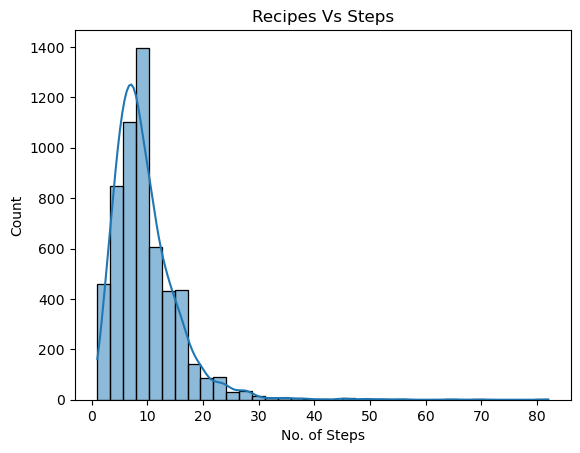

In [60]:
#plotting no of steps
sns.histplot(data=recipes_25_reviews, x="n_steps",kde=True,bins=35)
plt.title("Recipes Vs Steps")
plt.xlabel("No. of Steps")
plt.savefig("./Charts/RecipesVsSteps.png")
plt.show()

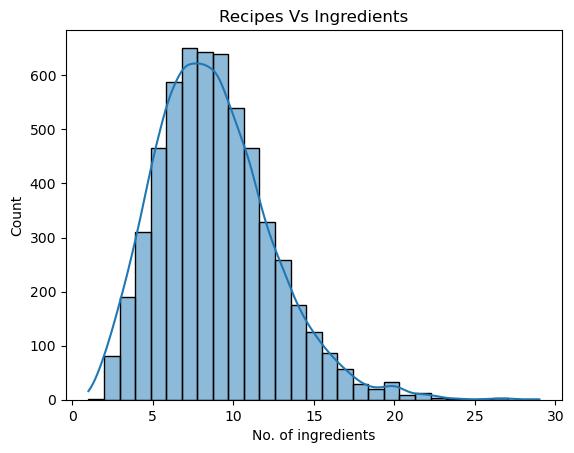

In [61]:
sns.histplot(data=recipes_25_reviews, x="n_ingredients",bins=29,kde=True)
plt.title("Recipes Vs Ingredients")
plt.xlabel("No. of ingredients")
plt.savefig("./Charts/RecipesVsIngredients.png")
plt.show()

In [31]:
pip install wordcloud

Want to see the most common ingredients?


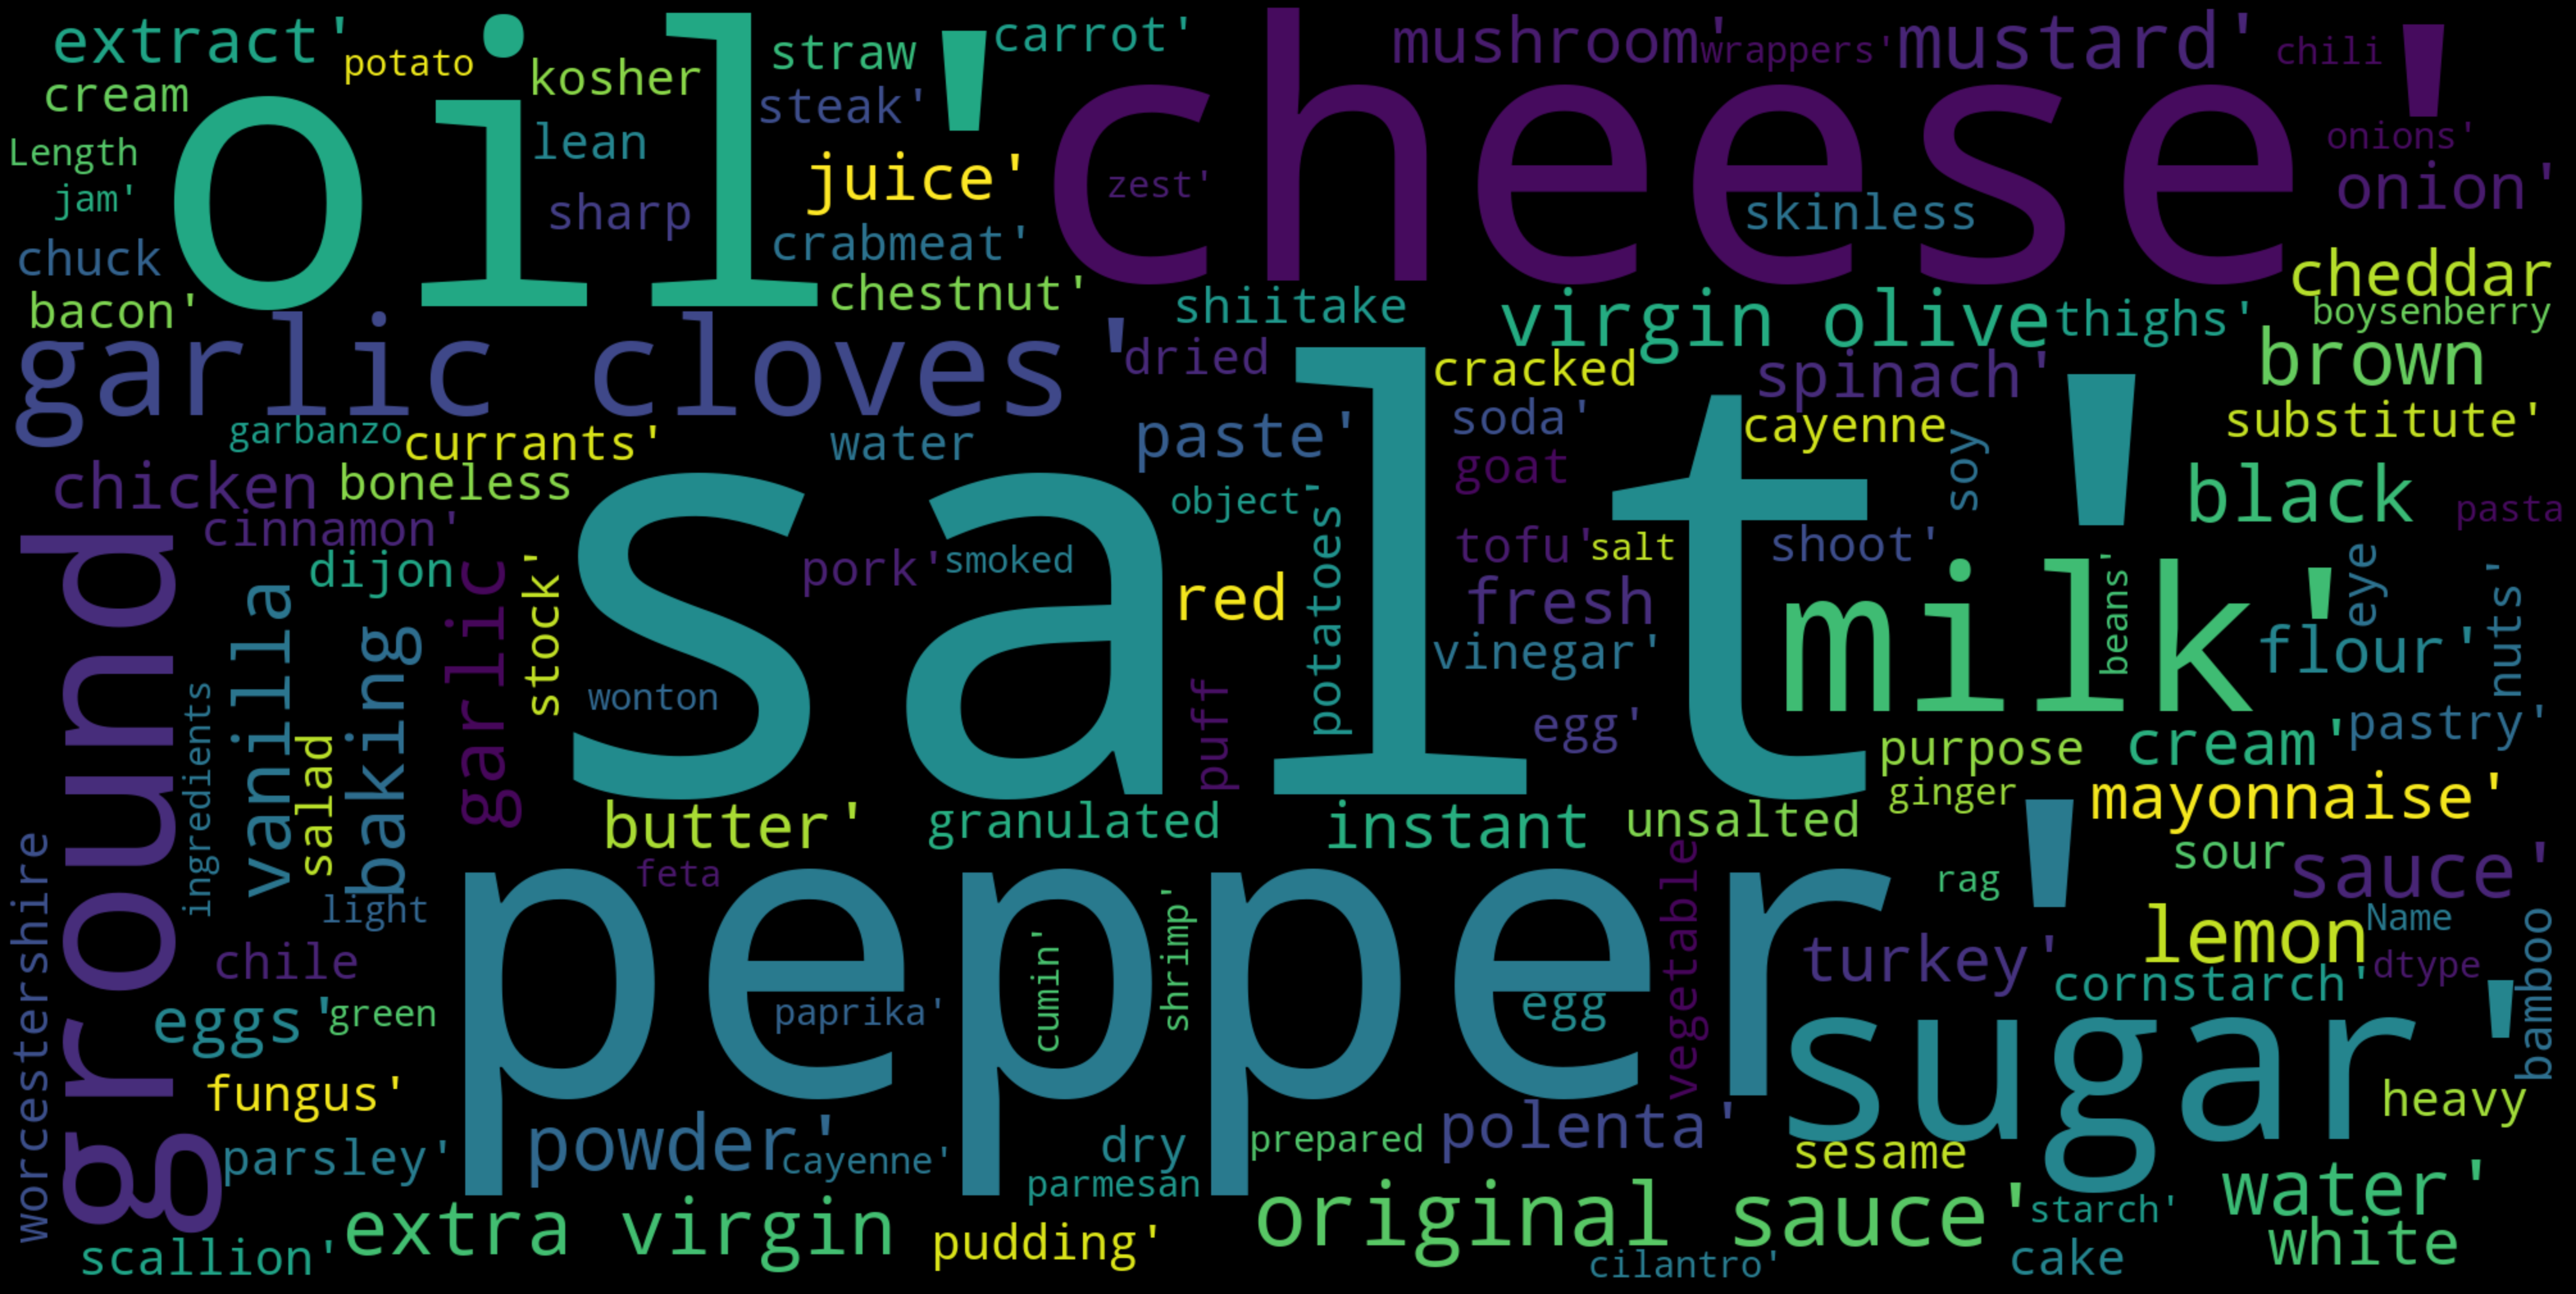

In [64]:
# Import package
ingredients=recipes_25_reviews['ingredients']

print("Want to see the most common ingredients?")

wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(ingredients))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("./Charts/wordcloud_ingredients.png")
plt.show()


In [50]:
#names = pd.read_csv(file, usecols=['Shrt_Desc', 'Carbohydrt_(g)']).items
print("For further nutritional information for each specific ingredient please use nutrient checker below")
import pprint
pp = pprint.PrettyPrinter(indent=4)

categories = { }

for index, row in df.iterrows():
    name=row['Shrt_Desc']
    maincat =(name.split(",")[0])
    name = name.split(",")
    name.remove(maincat)
    subcats=(','.join(name))
    subcat_data={'Cholesterol':row['Cholestrl_(mg)'],'Carbs (g)':row['Carbohydrt_(g)'], 'Calories':row['Energ_Kcal'], 'Sugars':row['Sugar_Tot_(g)'], 'Sodium': row['Sodium_(mg)'], 'Saturated Fat':row['FA_Sat_(g)']}
    #     if maincat == 'MCDONALDS': 
    #         print(maincat + '->' + subcats )

    if maincat in categories.keys() and len(subcats) > 0:
        categories[maincat][subcats]=subcat_data
    elif len(subcats) >0:
        categories[maincat]={subcats:subcat_data}
    
pp.pprint(categories)

For further nutritional information for each specific ingredient please use nutrient checker below
{   'ABALONE': {   'MIXED SPECIES,RAW': {   'Calories': 105,
                                            'Carbs (g)': 6.01,
                                            'Cholesterol': 85.0,
                                            'Saturated Fat': 0.149,
                                            'Sodium': 301.0,
                                            'Sugars': 0.0},
                   'MXD SP,CKD,FRIED': {   'Calories': 189,
                                           'Carbs (g)': 11.05,
                                           'Cholesterol': 94.0,
                                           'Saturated Fat': 1.646,
                                           'Sodium': 591.0,
                                           'Sugars': nan}},
    'ABIYUCH': {   'RAW': {   'Calories': 69,
                              'Carbs (g)': 17.6,
                              'Cholesterol': nan,
    

                      'CHICK TENDERS PLATTER': {   'Calories': 297,
                                                   'Carbs (g)': 17.98,
                                                   'Cholesterol': 52.0,
                                                   'Saturated Fat': 2.8489999999999998,
                                                   'Sodium': 740.0,
                                                   'Sugars': 0.36},
                      "CHICK TENDERS,FROM KIDS' MENU": {   'Calories': 296,
                                                           'Carbs (g)': 18.36,
                                                           'Cholesterol': 51.0,
                                                           'Saturated Fat': 2.852,
                                                           'Sodium': 763.0,
                                                           'Sugars': 0.39},
                      'CHILI': {   'Calories': 157,
                                   'Carbs (

                                                                    'Carbs (g)': 61.59,
                                                                    'Cholesterol': 13.0,
                                                                    'Saturated Fat': 4.669,
                                                                    'Sodium': 71.0,
                                                                    'Sugars': 0.0}},
    'BABYFOO': {   'BAN WI MIX BERR,ST': {   'Calories': 92,
                                             'Carbs (g)': 21.31,
                                             'Cholesterol': 0.0,
                                             'Saturated Fat': 0.081,
                                             'Sodium': 0.0,
                                             'Sugars': 15.0}},
    'BABYFOOD': {   'APPL YOGURT DSSRT,STR': {   'Calories': 96,
                                                 'Carbs (g)': 19.5,
                                              

                                                         'Sugars': 12.2},
                    'DSSRT,CUSTARD PUDD,VANILLA,STR': {   'Calories': 85,
                                                          'Carbs (g)': 16.0,
                                                          'Cholesterol': 8.0,
                                                          'Saturated Fat': 1.01,
                                                          'Sodium': 0.0,
                                                          'Sugars': 11.5},
                    'DSSRT,DUTCH APPL,JR': {   'Calories': 79,
                                               'Carbs (g)': 19.18,
                                               'Cholesterol': 0.0,
                                               'Saturated Fat': 0.025,
                                               'Sodium': 3.0,
                                               'Sugars': 17.89},
                    'DSSRT,DUTCH APPL,STR': {   'Calories': 75,
         

                    'SNACK,GERBER GRADUATE FRUIT STRIPS,REAL FRUIT BARS': {   'Calories': 330,
                                                                              'Carbs (g)': 76.61,
                                                                              'Cholesterol': 0.0,
                                                                              'Saturated Fat': 0.364,
                                                                              'Sodium': 14.0,
                                                                              'Sugars': 68.65},
                    'SNACK,GERBER GRADUATE YOGURT MELTS': {   'Calories': 429,
                                                              'Carbs (g)': 71.43,
                                                              'Cholesterol': 0.0,
                                                              'Saturated Fat': 2.2359999999999998,
                                                              'Sodium': 286

                                                                               'Sugars': nan},
                 'KIDNEY,RED,MATURE SEEDS,CND,SOL & LIQUIDS': {   'Calories': 81,
                                                                  'Carbs (g)': 14.83,
                                                                  'Cholesterol': 0.0,
                                                                  'Saturated Fat': 0.125,
                                                                  'Sodium': 256.0,
                                                                  'Sugars': 1.85},
                 'KIDNEY,RED,MATURE SEEDS,RAW': {   'Calories': 337,
                                                    'Carbs (g)': 61.29,
                                                    'Cholesterol': 0.0,
                                                    'Saturated Fat': 0.154,
                                                    'Sodium': 12.0,
                                      

                                                                     'Cholesterol': 381.0,
                                                                     'Saturated Fat': 2.53,
                                                                     'Sodium': 77.0,
                                                                     'Sugars': 0.0},
                'ASTRL,WGYU,LN,TP LN STK/RST,BNLS LN, AUS MRBL SC 4/5 RW': {   'Calories': 223,
                                                                               'Carbs (g)': 0.2,
                                                                               'Cholesterol': 58.0,
                                                                               'Saturated Fat': 5.909,
                                                                               'Sodium': 61.0,
                                                                               'Sugars': 0.0},
                'ASTRLIAN,GRSSFD,LOIN,TOP LOIN STEAK/ROAST,BN

                                                                                'Sugars': 0.0},
                'CHUCK EYE RST,BNLS,A BF RST,LN & FAT,0" FAT,CHOIC,RAW': {   'Calories': 185,
                                                                             'Carbs (g)': 0.0,
                                                                             'Cholesterol': 67.0,
                                                                             'Saturated Fat': 5.072,
                                                                             'Sodium': 80.0,
                                                                             'Sugars': 0.0},
                'CHUCK EYE RST,BNLS,A BF RST,LN & FAT,0" FAT,SEL,RAW': {   'Calories': 173,
                                                                           'Carbs (g)': 0.0,
                                                                           'Cholesterol': 73.0,
                                                 

                                                               'Sugars': 0.0},
                'COMP OF RTL CUTS,LN&FAT,1/8"FAT,SEL,RAW': {   'Calories': 223,
                                                               'Carbs (g)': 0.0,
                                                               'Cholesterol': 65.0,
                                                               'Saturated Fat': 6.37,
                                                               'Sodium': 58.0,
                                                               'Sugars': 0.0},
                'COMP OF RTL CUTS,LN,0" FAT,ALL GRDS,CKD': {   'Calories': 211,
                                                               'Carbs (g)': 0.0,
                                                               'Cholesterol': 86.0,
                                                               'Saturated Fat': 3.54,
                                                               'Sodium': 66.0,
                      

                'LOIN,TENDERLOIN STEAK,BNLESS,LN,0" FAT,SEL,CKD,GRILLED': {   'Calories': 198,
                                                                              'Carbs (g)': 0.0,
                                                                              'Cholesterol': 93.0,
                                                                              'Saturated Fat': 2.8760000000000003,
                                                                              'Sodium': 55.0,
                                                                              'Sugars': 0.0},
                'LOIN,TENDERLOIN STEAK,BNLESS,LN,0" FAT,SEL,RAW': {   'Calories': 135,
                                                                      'Carbs (g)': 0.0,
                                                                      'Cholesterol': 62.0,
                                                                      'Saturated Fat': 1.706,
                                               

                                                                'Sugars': 0.0},
                'NZ,IMP,STRIPLOIN,LN & FAT,RAW': {   'Calories': 252,
                                                     'Carbs (g)': 0.6,
                                                     'Cholesterol': 57.0,
                                                     'Saturated Fat': 8.064,
                                                     'Sodium': 43.0,
                                                     'Sugars': 0.0},
                'NZ,IMP,STRIPLOIN,LN,CKD,FAST FRIED': {   'Calories': 217,
                                                          'Carbs (g)': 0.0,
                                                          'Cholesterol': 70.0,
                                                          'Saturated Fat': 3.918,
                                                          'Sodium': 55.0,
                                                          'Sugars': 0.0},
                'NZ,IMP,STRIPL

                                                                     'Sugars': nan},
                'RIB,LRG END (RIBS 6-9),LN,0"FAT,ALL GRDS,CKD,RSTD': {   'Calories': 238,
                                                                         'Carbs (g)': 0.0,
                                                                         'Cholesterol': 81.0,
                                                                         'Saturated Fat': 5.35,
                                                                         'Sodium': 73.0,
                                                                         'Sugars': 0.0},
                'RIB,LRG END (RIBS 6-9),LN,0"FAT,CHOIC,CKD,RSTD': {   'Calories': 253,
                                                                      'Carbs (g)': 0.0,
                                                                      'Cholesterol': 81.0,
                                                                      'Saturated Fat': 5.99,
       

                'RND,EYE OF RND STEAK,BNLESS,LN,0" FAT,SEL,CKD,GRILLED': {   'Calories': 149,
                                                                             'Carbs (g)': 0.0,
                                                                             'Cholesterol': 81.0,
                                                                             'Saturated Fat': 1.3130000000000002,
                                                                             'Sodium': 65.0,
                                                                             'Sugars': 0.0},
                'RND,EYE OF RND STEAK,BNLESS,LN,0" FAT,SEL,RAW': {   'Calories': 116,
                                                                     'Carbs (g)': 0.0,
                                                                     'Cholesterol': 62.0,
                                                                     'Saturated Fat': 1.011,
                                                         

                'SHLDR POT RST OR STEAK,BNLESS,LN & FAT,0" FAT,SEL,RAW': {   'Calories': 127,
                                                                             'Carbs (g)': 0.0,
                                                                             'Cholesterol': 68.0,
                                                                             'Saturated Fat': 1.78,
                                                                             'Sodium': 70.0,
                                                                             'Sugars': 0.0},
                'SHLDR POT RST OR STEAK,BNLESS,LN,0" FAT,ALL GRDS,RAW': {   'Calories': 123,
                                                                            'Carbs (g)': 0.0,
                                                                            'Cholesterol': 65.0,
                                                                            'Saturated Fat': 1.653,
                                           

                                                               'Saturated Fat': 5.9,
                                                               'Sodium': 60.0,
                                                               'Sugars': nan},
                'VAR MEATS&BY-PRODUCTS,PANCREAS,RAW': {   'Calories': 235,
                                                          'Carbs (g)': 0.0,
                                                          'Cholesterol': 205.0,
                                                          'Saturated Fat': 6.41,
                                                          'Sodium': 67.0,
                                                          'Sugars': nan},
                'VAR MEATS&BY-PRODUCTS,SPLEEN,CKD,BRSD': {   'Calories': 145,
                                                             'Carbs (g)': 0.0,
                                                             'Cholesterol': 347.0,
                                                         

                                                                           'Saturated Fat': 2.235,
                                                                           'Sodium': 62.0,
                                                                           'Sugars': 0.0},
              'CHK,CLD,SHDR TNDR,MED,LN & FAT,0" FAT,ALL GRDS,CK,GRLD': {   'Calories': 177,
                                                                            'Carbs (g)': 0.0,
                                                                            'Cholesterol': 78.0,
                                                                            'Saturated Fat': 2.833,
                                                                            'Sodium': 59.0,
                                                                            'Sugars': 0.0},
              'CHK,CLD,SHLDR TNDR,MEDALLION,LN & FAT,0" FAT,ALL GRDS,RAW': {   'Calories': 144,
                                                       

                                        'Cholesterol': 0.0,
                                        'Saturated Fat': 1.081,
                                        'Sodium': 347.0,
                                        'Sugars': 5.68},
                 'RAISIN,TSTD,ENR': {   'Calories': 297,
                                        'Carbs (g)': 56.9,
                                        'Cholesterol': 0.0,
                                        'Saturated Fat': 1.175,
                                        'Sodium': 377.0,
                                        'Sugars': 6.18},
                 'RAISIN,UNENRICHED': {   'Calories': 274,
                                          'Carbs (g)': 52.3,
                                          'Cholesterol': 0.0,
                                          'Saturated Fat': 1.081,
                                          'Sodium': 390.0,
                                          'Sugars': nan},
                 'RED-CAL,OAT BRAN': {   'C

                                                    'Saturated Fat': 5.773,
                                                    'Sodium': 289.0,
                                                    'Sugars': 3.52},
                       'DOUBLE WHOPPER,W/ CHS': {   'Calories': 266,
                                                    'Carbs (g)': 13.52,
                                                    'Cholesterol': 47.0,
                                                    'Saturated Fat': 6.997999999999999,
                                                    'Sodium': 387.0,
                                                    'Sugars': 3.61},
                       'FRENCH FR': {   'Calories': 280,
                                        'Carbs (g)': 38.7,
                                        'Cholesterol': nan,
                                        'Saturated Fat': 2.137,
                                        'Sodium': 279.0,
                                        'Sugars':

                                                                     'Carbs (g)': 5.71,
                                                                     'Cholesterol': 10.0,
                                                                     'Saturated Fat': 0.408,
                                                                     'Sodium': 322.0,
                                                                     'Sugars': 1.22},
                      ' TOMATO JUC,LO NA': {   'Calories': 21,
                                               'Carbs (g)': 4.12,
                                               'Cholesterol': 0.0,
                                               'Saturated Fat': 0.0,
                                               'Sodium': 58.0,
                                               'Sugars': 2.88},
                      '25% LESS NA CHICK NOODLE SOUP,COND': {   'Calories': 49,
                                                                'Carbs (g)': 6.3,
   

                                                       'Saturated Fat': 0.397,
                                                       'Sodium': 516.0,
                                                       'Sugars': 5.56},
                                  'VEGETARIAN VEG SOUP,COND': {   'Calories': 71,
                                                                  'Carbs (g)': 14.29,
                                                                  'Cholesterol': 0.0,
                                                                  'Saturated Fat': 0.0,
                                                                  'Sodium': 516.0,
                                                                  'Sugars': 4.76}},
    "CAMPBELL'S RED & WHITE - MCRWVEABLE BOWLS": {   'CHICK NOODLE SOUP': {   'Calories': 30,
                                                                              'Carbs (g)': 4.08,
                                                                             

                                                                     'Saturated Fat': 18.96,
                                                                     'Sodium': 198.0,
                                                                     'Sugars': 48.25},
                   'MARS SNACKFOOD US,TWIX CHOC FUDGE COOKIE BARS': {   'Calories': 550,
                                                                        'Carbs (g)': 56.0,
                                                                        'Cholesterol': 6.0,
                                                                        'Saturated Fat': 4.962,
                                                                        'Sodium': 266.0,
                                                                        'Sugars': 53.0},
                   'MARS SNACKFOOD US,TWIX PNUT BUTTER COOKIE BARS': {   'Calories': 536,
                                                                         'Carbs (g)': 54.15,
     

                                           'Sodium': 12.0,
                                           'Sugars': 8.8}},
    'CARDOON': {   'CKD,BLD,DRND,W/SALT': {   'Calories': 20,
                                              'Carbs (g)': 4.74,
                                              'Cholesterol': 0.0,
                                              'Saturated Fat': 0.012,
                                              'Sodium': 412.0,
                                              'Sugars': nan},
                   'CKD,BLD,DRND,WO/SALT': {   'Calories': 22,
                                               'Carbs (g)': 5.33,
                                               'Cholesterol': 0.0,
                                               'Saturated Fat': 0.012,
                                               'Sodium': 176.0,
                                               'Sugars': nan},
                   'RAW': {   'Calories': 17,
                              'Carbs (g)': 4.07,
    

                                                       'Carbs (g)': 77.26,
                                                       'Cholesterol': 0.0,
                                                       'Saturated Fat': 0.08,
                                                       'Sodium': 3.0,
                                                       'Sugars': 0.0},
                   'MALT-O-MEAL,ORIGINAL,PLN,PREP W/ H2O,WO/ SALT': {   'Calories': 48,
                                                                        'Carbs (g)': 9.2,
                                                                        'Cholesterol': 0.0,
                                                                        'Saturated Fat': 0.01,
                                                                        'Sodium': 0.0,
                                                                        'Sugars': 0.13},
                   "OAT BRAN,QKR,QKR/MOTHER'S OAT BRAN,PREP W/H2O,SALT": {   'Calories': 4

                                                            'Sugars': 21.0},
                       'GENERAL MILLS,BERRY BURST CHEERIOS,TRIPLE BERRY': {   'Calories': 378,
                                                                              'Carbs (g)': 80.5,
                                                                              'Cholesterol': 0.0,
                                                                              'Saturated Fat': 1.0,
                                                                              'Sodium': 639.0,
                                                                              'Sugars': 27.0},
                       'GENERAL MILLS,BOO BERRY': {   'Calories': 386,
                                                      'Carbs (g)': 85.4,
                                                      'Cholesterol': 0.0,
                                                      'Saturated Fat': 0.5,
                                                 

                       "KELLOGG'S FRSTD MINI-WHEATS LITTLE BITES,CHOC": {   'Calories': 354,
                                                                            'Carbs (g)': 81.4,
                                                                            'Cholesterol': 0.0,
                                                                            'Saturated Fat': 1.5,
                                                                            'Sodium': 371.0,
                                                                            'Sugars': 22.29},
                       "KELLOGG'S FRSTD MINI-WHEATS TOUCH FRUIT MDL,RASP": {   'Calories': 342,
                                                                               'Carbs (g)': 82.1,
                                                                               'Cholesterol': 0.0,
                                                                               'Saturated Fat': 0.5,
                                     

                                                                       'Saturated Fat': 0.97,
                                                                       'Sodium': 234.0,
                                                                       'Sugars': 25.65},
                       'QUAKER,MAPLE BROWN SUGAR LIFE CRL': {   'Calories': 373,
                                                                'Carbs (g)': 78.86,
                                                                'Cholesterol': 0.0,
                                                                'Saturated Fat': 0.765,
                                                                'Sodium': 477.0,
                                                                'Sugars': 24.9},
                       "QUAKER,MOTHER'S CINN OAT CRUNCH": {   'Calories': 382,
                                                              'Carbs (g)': 79.79,
                                                              'Choles

                  'PORT DE SALUT': {   'Calories': 352,
                                       'Carbs (g)': 0.57,
                                       'Cholesterol': 123.0,
                                       'Saturated Fat': 16.691,
                                       'Sodium': 534.0,
                                       'Sugars': 0.57},
                  'PROVOLONE': {   'Calories': 351,
                                   'Carbs (g)': 2.14,
                                   'Cholesterol': 69.0,
                                   'Saturated Fat': 17.078,
                                   'Sodium': 876.0,
                                   'Sugars': 0.56},
                  'PROVOLONE,RED FAT': {   'Calories': 274,
                                           'Carbs (g)': 3.5,
                                           'Cholesterol': 55.0,
                                           'Saturated Fat': 11.3,
                                           'Sodium': 615.0,
            

                                                                              'Sodium': 275.0,
                                                                              'Sugars': 0.0},
                   'BROILERS OR FRYERS,BREAST,MEAT&SKN,CKD,FRIED,FLR': {   'Calories': 222,
                                                                           'Carbs (g)': 1.64,
                                                                           'Cholesterol': 89.0,
                                                                           'Saturated Fat': 2.45,
                                                                           'Sodium': 76.0,
                                                                           'Sugars': nan},
                   'BROILERS OR FRYERS,BREAST,MEAT&SKN,CKD,RSTD': {   'Calories': 197,
                                                                      'Carbs (g)': 0.0,
                                                                      'Cho

                                                          'Cholesterol': 91.0,
                                                          'Saturated Fat': 0.85,
                                                          'Sodium': 68.0,
                                                          'Sugars': 0.0},
                   'CORNISH GAME HENS,MEAT&SKN,CKD,RSTD': {   'Calories': 259,
                                                              'Carbs (g)': 0.0,
                                                              'Cholesterol': 131.0,
                                                              'Saturated Fat': 5.05,
                                                              'Sodium': 64.0,
                                                              'Sugars': 0.0},
                   'CORNISH GAME HENS,MEAT&SKN,RAW': {   'Calories': 200,
                                                         'Carbs (g)': 0.0,
                                                         'C

    'CISCO': {   'RAW': {   'Calories': 98,
                            'Carbs (g)': 0.0,
                            'Cholesterol': 50.0,
                            'Saturated Fat': 0.42100000000000004,
                            'Sodium': 55.0,
                            'Sugars': nan},
                 'SMOKED': {   'Calories': 177,
                               'Carbs (g)': 0.0,
                               'Cholesterol': 32.0,
                               'Saturated Fat': 1.7409999999999999,
                               'Sodium': 481.0,
                               'Sugars': 0.0}},
    'CITRUS FRUIT JUC DRK': {   'FRZ CONC': {   'Calories': 162,
                                                'Carbs (g)': 40.2,
                                                'Cholesterol': 0.0,
                                                'Saturated Fat': 0.006999999999999999,
                                                'Sodium': 3.0,
                                            

                                                   'Carbs (g)': 68.2,
                                                   'Cholesterol': 27.0,
                                                   'Saturated Fat': 7.7589999999999995,
                                                   'Sodium': 232.0,
                                                   'Sugars': nan},
                   'CHOC SNDWCH,W/ CREME FILLING,RED FAT': {   'Calories': 436,
                                                               'Carbs (g)': 76.17,
                                                               'Cholesterol': 0.0,
                                                               'Saturated Fat': 2.9410000000000003,
                                                               'Sodium': 471.0,
                                                               'Sugars': 41.18},
                   'CHOC SNDWCH,W/CREME FILLING,REG': {   'Calories': 464,
                                                     

    'CORN W/RED&GRN PEPPERS': {   'CND,SOL&LIQUIDS': {   'Calories': 75,
                                                         'Carbs (g)': 18.17,
                                                         'Cholesterol': 0.0,
                                                         'Saturated Fat': 0.085,
                                                         'Sodium': 347.0,
                                                         'Sugars': nan}},
    'CORN-BASED': {   'EXTRUDED,CHIPS,BARBECUE-FLAVOR': {   'Calories': 523,
                                                            'Carbs (g)': 56.2,
                                                            'Cholesterol': 0.0,
                                                            'Saturated Fat': 4.46,
                                                            'Sodium': 763.0,
                                                            'Sugars': nan},
                      'EXTRUDED,CONES,PLN': {   'Calories': 510,
       

                                              'Saturated Fat': 5.562,
                                              'Sodium': 726.0,
                                              'Sugars': 8.18},
                    'STD SNACK-TYPE,REG,LO SALT': {   'Calories': 502,
                                                      'Carbs (g)': 61.0,
                                                      'Cholesterol': 0.0,
                                                      'Saturated Fat': 3.7760000000000002,
                                                      'Sodium': 216.0,
                                                      'Sugars': 1.79},
                    'STD SNACK-TYPE,SNDWCH,W/CHS FILLING': {   'Calories': 477,
                                                               'Carbs (g)': 61.7,
                                                               'Cholesterol': 2.0,
                                                               'Saturated Fat': 6.125,
                     

                         'CINN,ENR': {   'Calories': 403,
                                         'Carbs (g)': 44.6,
                                         'Cholesterol': 21.0,
                                         'Saturated Fat': 5.681,
                                         'Sodium': 414.0,
                                         'Sugars': 19.78},
                         'CINN,UNENR': {   'Calories': 403,
                                           'Carbs (g)': 44.6,
                                           'Cholesterol': 21.0,
                                           'Saturated Fat': 5.681,
                                           'Sodium': 371.0,
                                           'Sugars': nan},
                         'FRUIT,ENR': {   'Calories': 371,
                                          'Carbs (g)': 47.8,
                                          'Cholesterol': 114.0,
                                          'Saturated Fat': 4.86,
                 

               'WHL,RAW,FRZ,SALTED,PAST': {   'Calories': 138,
                                              'Carbs (g)': 0.83,
                                              'Cholesterol': 387.0,
                                              'Saturated Fat': 3.178,
                                              'Sodium': 3663.0,
                                              'Sugars': 0.07},
               'WHOLE,COOKED,OMELET': {   'Calories': 154,
                                          'Carbs (g)': 0.64,
                                          'Cholesterol': 313.0,
                                          'Saturated Fat': 3.319,
                                          'Sodium': 155.0,
                                          'Sugars': 0.31},
               'WHOLE,DRIED': {   'Calories': 605,
                                  'Carbs (g)': 1.53,
                                  'Cholesterol': 1630.0,
                                  'Saturated Fat': 13.515999999999998,
       

                                                                             'Carbs (g)': 24.97,
                                                                             'Cholesterol': 36.0,
                                                                             'Saturated Fat': 5.181,
                                                                             'Sodium': 546.0,
                                                                             'Sugars': 5.11},
                      'CHEESEBURGER; SINGLE,REG PATTY; PLN': {   'Calories': 308,
                                                                 'Carbs (g)': 28.03,
                                                                 'Cholesterol': 43.0,
                                                                 'Saturated Fat': 6.473,
                                                                 'Sodium': 515.0,
                                                                 'Sugars': 4.88},
          

                                  'Cholesterol': 0.0,
                                  'Saturated Fat': 0.09,
                                  'Sodium': 52.0,
                                  'Sugars': 3.93}},
    'FIDDLEHEAD FERNS': {   'FRZ,UNPREP': {   'Calories': 34,
                                              'Carbs (g)': 5.74,
                                              'Cholesterol': 0.0,
                                              'Saturated Fat': nan,
                                              'Sodium': 0.0,
                                              'Sugars': nan},
                            'RAW': {   'Calories': 34,
                                       'Carbs (g)': 5.54,
                                       'Cholesterol': 0.0,
                                       'Saturated Fat': nan,
                                       'Sodium': 1.0,
                                       'Sugars': nan}},
    'FIGS': {   'CND,EX HVY SYRUP PK,SOL&LIQUIDS': {   'Calo

    'FRANKFURTER': {   'BF & PORK,LO FAT': {   'Calories': 152,
                                               'Carbs (g)': 4.4,
                                               'Cholesterol': 44.0,
                                               'Saturated Fat': 3.6919999999999997,
                                               'Sodium': 1257.0,
                                               'Sugars': 0.0},
                       'BF,LO FAT': {   'Calories': 230,
                                        'Carbs (g)': 1.6,
                                        'Cholesterol': 40.0,
                                        'Saturated Fat': 8.1,
                                        'Sodium': 1041.0,
                                        'Sugars': 0.0},
                       'BF,PORK,& TURKEY,FAT FREE': {   'Calories': 109,
                                                        'Carbs (g)': 11.21,
                                                        'Cholesterol': 41.0,
             

                                                               'Sodium': 41.0,
                                                               'Sugars': 0.0},
                     'BISON,TOP RND,LN,1" STEAK,RAW': {   'Calories': 122,
                                                          'Carbs (g)': 0.0,
                                                          'Cholesterol': 65.0,
                                                          'Saturated Fat': 1.0390000000000001,
                                                          'Sodium': 47.0,
                                                          'Sugars': 0.0},
                     'BISON,TOP SIRLOIN,LN,0"FAT,RAW': {   'Calories': 113,
                                                           'Carbs (g)': 0.0,
                                                           'Cholesterol': 71.0,
                                                           'Saturated Fat': 0.885,
                                                     

                                                                        'Cholesterol': 12.0,
                                                                        'Saturated Fat': 17.01,
                                                                        'Sodium': 193.0,
                                                                        'Sugars': 23.74},
                        'SOFT,UNCOATED,CHOC CHIP': {   'Calories': 418,
                                                       'Carbs (g)': 70.2,
                                                       'Cholesterol': 0.0,
                                                       'Saturated Fat': 6.061,
                                                       'Sodium': 251.0,
                                                       'Sugars': 28.92},
                        'SOFT,UNCOATED,CHOC CHIP,GRAHAM&MARSHMLLW': {   'Calories': 427,
                                                                        'Carbs (g)': 70.8,
       

                                                             'Cholesterol': nan,
                                                             'Saturated Fat': nan,
                                                             'Sodium': 2.0,
                                                             'Sugars': nan}},
    'HAZELNUTS OR FILBERTS': {   'BLANCHED': {   'Calories': 629,
                                                 'Carbs (g)': 17.0,
                                                 'Cholesterol': 0.0,
                                                 'Saturated Fat': 4.669,
                                                 'Sodium': 0.0,
                                                 'Sugars': 3.49},
                                 'DRY RSTD,WO/SALT': {   'Calories': 646,
                                                         'Carbs (g)': 17.6,
                                                         'Cholesterol': 0.0,
                                                 

                                                                               'Sodium': 35.0,
                                                                               'Sugars': 14.0},
                     'MEAD JOHNS,ENFAMIL,NUTRAMIG,AA LIPIL,PDR,NOT RECON': {   'Calories': 500,
                                                                               'Carbs (g)': 51.0,
                                                                               'Cholesterol': 0.0,
                                                                               'Saturated Fat': 10.812999999999999,
                                                                               'Sodium': 230.0,
                                                                               'Sugars': 51.0},
                     'PBM PRODU,STORE BR,SOY,LIQ CONC,NOT RECON': {   'Calories': 126,
                                                                      'Carbs (g)': 12.18,
                               

                                         'Sugars': nan},
                     'RAW': {   'Calories': 95,
                                'Carbs (g)': 23.25,
                                'Cholesterol': 0.0,
                                'Saturated Fat': 0.195,
                                'Sodium': 2.0,
                                'Sugars': 19.08}},
    "JACKSON'S": {   'OLD FASHIONED LEMON JUMBLE COOKIES': {   'Calories': 469,
                                                               'Carbs (g)': 71.7,
                                                               'Cholesterol': 6.0,
                                                               'Saturated Fat': 5.9,
                                                               'Sodium': 334.0,
                                                               'Sugars': 31.6},
                     'OLD FASHIONED VANILLA WAFERS': {   'Calories': 453,
                                                         'Carbs (g)': 74.

                   "CHIPS DELUXE,SOFT 'N CHEWY CHOC CHIP COOKIES": {   'Calories': 464,
                                                                       'Carbs (g)': 67.4,
                                                                       'Cholesterol': 5.0,
                                                                       'Saturated Fat': 8.5,
                                                                       'Sodium': 349.0,
                                                                       'Sugars': 29.9},
                   'CHS & CHEDDAR SNDWCH CRACKERS': {   'Calories': 502,
                                                        'Carbs (g)': 59.5,
                                                        'Cholesterol': 4.0,
                                                        'Saturated Fat': 6.4,
                                                        'Sodium': 760.0,
                                                        'Sugars': 13.4},
              

                                                                  'Sodium': 958.0,
                                                                  'Sugars': 8.0},
                   'TOWN HOUSE,TOPPERS,MULTIGRAIN CRACKERS': {   'Calories': 462,
                                                                 'Carbs (g)': 68.4,
                                                                 'Cholesterol': 0.0,
                                                                 'Saturated Fat': 3.0,
                                                                 'Sodium': 871.0,
                                                                 'Sugars': 13.7},
                   'TOWN HOUSE,TOPPERS,ORIGINAL CRACKERS': {   'Calories': 483,
                                                               'Carbs (g)': 66.8,
                                                               'Cholesterol': 0.0,
                                                               'Saturated Fat': 2.9,
   

                                                                 'Saturated Fat': 2.2,
                                                                 'Sodium': 764.0,
                                                                 'Sugars': 3.5},
                     'SPL K,CRACKER CHIPS,SOUTHWEST RANCH': {   'Calories': 380,
                                                                'Carbs (g)': 74.8,
                                                                'Cholesterol': 2.0,
                                                                'Saturated Fat': 1.8,
                                                                'Sodium': 750.0,
                                                                'Sugars': 4.3},
                     'SPL K,MULTIGRAIN CRACKERS': {   'Calories': 401,
                                                      'Carbs (g)': 75.4,
                                                      'Cholesterol': 0.0,
                                     

                                                          'Sodium': 79.0,
                                                          'Sugars': nan},
                'DOM,LEG,SHANK HALF,LN&FAT,1/4"FAT,CHOIC,CKD,RSTD': {   'Calories': 225,
                                                                        'Carbs (g)': 0.0,
                                                                        'Cholesterol': 90.0,
                                                                        'Saturated Fat': 5.09,
                                                                        'Sodium': 65.0,
                                                                        'Sugars': nan},
                'DOM,LEG,SHANK HALF,LN&FAT,1/4"FAT,CHOIC,RAW': {   'Calories': 201,
                                                                   'Carbs (g)': 0.0,
                                                                   'Cholesterol': 67.0,
                                                    

                'NZ,IMP,FRZ,LOIN,LN&FAT,1/8"FAT,RAW': {   'Calories': 273,
                                                          'Carbs (g)': 0.0,
                                                          'Cholesterol': 82.0,
                                                          'Saturated Fat': 11.23,
                                                          'Sodium': 39.0,
                                                          'Sugars': nan},
                'NZ,IMP,FRZ,LOIN,LN&FAT,CKD,BRLD': {   'Calories': 315,
                                                       'Carbs (g)': 0.0,
                                                       'Cholesterol': 112.0,
                                                       'Saturated Fat': 11.96,
                                                       'Sodium': 49.0,
                                                       'Sugars': 0.0},
                'NZ,IMP,FRZ,LOIN,LN,CKD,BRLD': {   'Calories': 199,
                             

    'LASAGNA': {   'CHS,FRZ,PREP': {   'Calories': 130,
                                       'Carbs (g)': 13.84,
                                       'Cholesterol': 13.0,
                                       'Saturated Fat': 2.11,
                                       'Sodium': 284.0,
                                       'Sugars': 4.23},
                   'CHS,FRZ,UNPREP': {   'Calories': 145,
                                         'Carbs (g)': 21.61,
                                         'Cholesterol': 11.0,
                                         'Saturated Fat': 2.11,
                                         'Sodium': 312.0,
                                         'Sugars': 3.8},
                   'VEG,FRZ,BKD': {   'Calories': 139,
                                      'Carbs (g)': 14.18,
                                      'Cholesterol': 14.0,
                                      'Saturated Fat': 2.4219999999999997,
                                      'Sodiu

                                                    'Carbs (g)': 3.7,
                                                    'Cholesterol': 0.0,
                                                    'Saturated Fat': 0.2,
                                                    'Sodium': 222.0,
                                                    'Sugars': 0.8}},
    'LONGANS': {   'DRIED': {   'Calories': 286,
                                'Carbs (g)': 74.0,
                                'Cholesterol': 0.0,
                                'Saturated Fat': nan,
                                'Sodium': 48.0,
                                'Sugars': nan},
                   'RAW': {   'Calories': 60,
                              'Carbs (g)': 15.14,
                              'Cholesterol': 0.0,
                              'Saturated Fat': nan,
                              'Sodium': 0.0,
                              'Sugars': nan}},
    'LOQUATS': {   'RAW': {   'Calories': 47,
        

                                          'Cholesterol': 1.0,
                                          'Saturated Fat': 2.381,
                                          'Sodium': 190.0,
                                          'Sugars': 66.67},
                          'CHOC,PDR,PREP W/ WHL MILK': {   'Calories': 85,
                                                           'Carbs (g)': 11.2,
                                                           'Cholesterol': 10.0,
                                                           'Saturated Fat': 1.883,
                                                           'Sodium': 60.0,
                                                           'Sugars': 6.68},
                          'CHOC,W/ ADDED NUTR,PDR,PREP W/ WHL MILK': {   'Calories': 87,
                                                                         'Carbs (g)': 11.19,
                                                                         'Cholesterol': 10.0,
          

                     'HOT CARAMEL SUNDAE': {   'Calories': 188,
                                               'Carbs (g)': 33.36,
                                               'Cholesterol': 16.0,
                                               'Saturated Fat': 2.468,
                                               'Sodium': 80.0,
                                               'Sugars': 23.54},
                     'HOT FUDGE SUNDAE': {   'Calories': 186,
                                             'Carbs (g)': 30.05,
                                             'Cholesterol': 13.0,
                                             'Saturated Fat': 3.592,
                                             'Sodium': 94.0,
                                             'Sugars': 26.89},
                     'HOT MUSTARD SAU': {   'Calories': 190,
                                            'Carbs (g)': 29.08,
                                            'Cholesterol': nan,
                           

                       'THICK VANILLA': {   'Calories': 112,
                                            'Carbs (g)': 17.75,
                                            'Cholesterol': 12.0,
                                            'Saturated Fat': 1.886,
                                            'Sodium': 95.0,
                                            'Sugars': 17.75}},
    'MILK SUBSTITUTES': {   'FLUID,W/LAURIC ACID OIL': {   'Calories': 61,
                                                           'Carbs (g)': 6.16,
                                                           'Cholesterol': 0.0,
                                                           'Saturated Fat': 3.037,
                                                           'Sodium': 78.0,
                                                           'Sugars': nan}},
    'MILKFISH': {   'COOKED,DRY HEAT': {   'Calories': 190,
                                           'Carbs (g)': 0.0,
                                

                                                                      'Cholesterol': 0.0,
                                                                      'Saturated Fat': 0.025,
                                                                      'Sodium': 10.0,
                                                                      'Sugars': 2.84},
                    'MATURE SEEDS,SPROUTED,CKD,STIR-FRIED': {   'Calories': 50,
                                                                'Carbs (g)': 10.59,
                                                                'Cholesterol': 0.0,
                                                                'Saturated Fat': 0.039,
                                                                'Sodium': 9.0,
                                                                'Sugars': nan},
                    'MATURE SEEDS,SPROUTED,RAW': {   'Calories': 30,
                                                     'Carbs (g)': 5.94,
       

                           '(TENDERGREEN),CKD,BLD,DRND,WO/SALT': {   'Calories': 16,
                                                                     'Carbs (g)': 2.8,
                                                                     'Cholesterol': 0.0,
                                                                     'Saturated Fat': nan,
                                                                     'Sodium': 14.0,
                                                                     'Sugars': nan},
                           '(TENDERGREEN),RAW': {   'Calories': 22,
                                                    'Carbs (g)': 3.9,
                                                    'Cholesterol': 0.0,
                                                    'Saturated Fat': 0.015,
                                                    'Sodium': 21.0,
                                                    'Sugars': nan}},
    'MUTTON': {   'CKD,RSTD (NAVAJO)': {   'Calories': 

                                              'Sodium': 0.0,
                                              'Sugars': 0.0},
               'CUPU ASSU': {   'Calories': 884,
                                'Carbs (g)': 0.0,
                                'Cholesterol': 0.0,
                                'Saturated Fat': 53.2,
                                'Sodium': 0.0,
                                'Sugars': 0.0},
               'FLAXSEED,COLD PRESSED': {   'Calories': 884,
                                            'Carbs (g)': 0.0,
                                            'Cholesterol': 0.0,
                                            'Saturated Fat': 8.976,
                                            'Sodium': 0.0,
                                            'Sugars': 0.0},
               'FLAXSEED,CONTAINS ADDED SLICED FLAXSEED': {   'Calories': 878,
                                                              'Carbs (g)': 0.39,
                                          

    'ONION RINGS': {   'BREADED,PAR FR,FRZ,PREP,HTD IN OVEN': {   'Calories': 276,
                                                                  'Carbs (g)': 33.79,
                                                                  'Cholesterol': 0.0,
                                                                  'Saturated Fat': 2.137,
                                                                  'Sodium': 370.0,
                                                                  'Sugars': 5.1},
                       'BREADED,PAR FR,FRZ,UNPREP': {   'Calories': 258,
                                                        'Carbs (g)': 30.53,
                                                        'Cholesterol': 0.0,
                                                        'Saturated Fat': 4.534,
                                                        'Sodium': 246.0,
                                                        'Sugars': nan}},
    'ONIONS': {   'CKD,BLD,DRND,W/SALT'

                                     'Carbs (g)': 0.0,
                                     'Cholesterol': 71.0,
                                     'Saturated Fat': 2.177,
                                     'Sodium': 72.0,
                                     'Sugars': 0.0},
                   'INSIDE LEG,CKD': {   'Calories': 141,
                                         'Carbs (g)': 0.0,
                                         'Cholesterol': 73.0,
                                         'Saturated Fat': 0.7,
                                         'Sodium': 83.0,
                                         'Sugars': 0.0},
                   'INSIDE LEG,RAW': {   'Calories': 111,
                                         'Carbs (g)': 0.0,
                                         'Cholesterol': 66.0,
                                         'Saturated Fat': 0.6,
                                         'Sodium': 72.0,
                                         'Sugars': 0.0},
        

                                                 'Sugars': 4.81},
                   'CND,HVY SYRUP PK,SOL&LIQUIDS': {   'Calories': 74,
                                                       'Carbs (g)': 19.94,
                                                       'Cholesterol': 0.0,
                                                       'Saturated Fat': 0.01,
                                                       'Sodium': 6.0,
                                                       'Sugars': 18.64},
                   'CND,HVY SYRUP,DRND': {   'Calories': 72,
                                             'Carbs (g)': 18.43,
                                             'Cholesterol': 0.0,
                                             'Saturated Fat': 0.013000000000000001,
                                             'Sodium': 6.0,
                                             'Sugars': 14.66},
                   'CND,JUC PK,SOL&LIQUIDS': {   'Calories': 44,
                             

                        'FRZ,CKD,BLD,DRND,WO/SALT': {   'Calories': 48,
                                                        'Carbs (g)': 10.12,
                                                        'Cholesterol': 0.0,
                                                        'Saturated Fat': 0.077,
                                                        'Sodium': 68.0,
                                                        'Sugars': 4.36},
                        'FRZ,UNPREP': {   'Calories': 53,
                                          'Carbs (g)': 11.15,
                                          'Cholesterol': 0.0,
                                          'Saturated Fat': 0.084,
                                          'Sodium': 79.0,
                                          'Sugars': nan}},
    'PEAS&ONIONS': {   'CND,SOL&LIQUIDS': {   'Calories': 51,
                                              'Carbs (g)': 8.57,
                                              'Cholesterol'

                                       'Saturated Fat': 2.457,
                                       'Sodium': 374.0,
                                       'Sugars': nan},
               'LEMON MERINGUE,COMMLY PREP': {   'Calories': 268,
                                                 'Carbs (g)': 47.2,
                                                 'Cholesterol': 45.0,
                                                 'Saturated Fat': 1.766,
                                                 'Sodium': 172.0,
                                                 'Sugars': 23.86},
               'LEMON MERINGUE,PREP FROM RECIPE': {   'Calories': 285,
                                                      'Carbs (g)': 39.1,
                                                      'Cholesterol': 53.0,
                                                      'Saturated Fat': 3.185,
                                                      'Sodium': 242.0,
                                                

                                                          'Carbs (g)': 30.49,
                                                          'Cholesterol': 25.0,
                                                          'Saturated Fat': 5.271,
                                                          'Sodium': 692.0,
                                                          'Sugars': 3.2}},
    'PIZZA HUT 12" SUPER SUPREME PIZZA': {   'HAND-TOSSED CRUST': {   'Calories': 243,
                                                                      'Carbs (g)': 25.62,
                                                                      'Cholesterol': 20.0,
                                                                      'Saturated Fat': 4.553999999999999,
                                                                      'Sodium': 689.0,
                                                                      'Sugars': 3.71}},
    'PIZZA HUT 14" CHS PIZZA': {   'HAND-TOSSED CRUST': {   'C

                'CURED,HAM -- H2O ADDED,SHANK,BONE-IN,LN & FAT,HTD,RSTD': {   'Calories': 200,
                                                                              'Carbs (g)': 1.35,
                                                                              'Cholesterol': 66.0,
                                                                              'Saturated Fat': 4.371,
                                                                              'Sodium': 988.0,
                                                                              'Sugars': 0.79},
                'CURED,HAM -- H2O ADDED,SHANK,BONE-IN,LN & FAT,UNHTD': {   'Calories': 167,
                                                                           'Carbs (g)': 0.66,
                                                                           'Cholesterol': 52.0,
                                                                           'Saturated Fat': 3.6069999999999998,
                       

                                                            'Cholesterol': 48.0,
                                                            'Saturated Fat': 0.6709999999999999,
                                                            'Sodium': 243.0,
                                                            'Sugars': 0.0},
                'FRSH,ENHANCED,LOIN,TOP LOIN (CHOPS),BNLESS,LN & FAT,RAW': {   'Calories': 171,
                                                                               'Carbs (g)': 0.0,
                                                                               'Cholesterol': 56.0,
                                                                               'Saturated Fat': 2.53,
                                                                               'Sodium': 251.0,
                                                                               'Sugars': 0.0},
                'FRSH,ENHANCED,LOIN,TOP LOIN (CHOPS),BNLESS,LN,CKD,BRLD': {   'Calo

                                                 'Carbs (g)': 0.0,
                                                 'Cholesterol': 79.0,
                                                 'Saturated Fat': 3.38,
                                                 'Sodium': 50.0,
                                                 'Sugars': 0.0},
                'FRSH,LOIN,WHL,LN,CKD,RSTD': {   'Calories': 209,
                                                 'Carbs (g)': 0.0,
                                                 'Cholesterol': 81.0,
                                                 'Saturated Fat': 3.51,
                                                 'Sodium': 58.0,
                                                 'Sugars': 0.0},
                'FRSH,LOIN,WHL,LN,RAW': {   'Calories': 143,
                                            'Carbs (g)': 0.0,
                                            'Cholesterol': 59.0,
                                            'Saturated Fat': 1.95,
 

                                                          'Carbs (g)': 0.69,
                                                          'Cholesterol': 74.0,
                                                          'Saturated Fat': 12.129000000000001,
                                                          'Sodium': 810.0,
                                                          'Sugars': 0.53},
                        'LINK/PATTY,RED FAT,CKD,PAN-FRIED': {   'Calories': 267,
                                                                'Carbs (g)': 0.15,
                                                                'Cholesterol': 82.0,
                                                                'Saturated Fat': 6.034,
                                                                'Sodium': 698.0,
                                                                'Sugars': 0.0},
                        'LINK/PATTY,RED FAT,UNPREP': {   'Calories': 217,
                           

                                                            'Carbs (g)': 25.01,
                                                            'Cholesterol': 0.0,
                                                            'Saturated Fat': 1.4269999999999998,
                                                            'Sodium': 300.0,
                                                            'Sugars': 0.37},
                    'YEL FLESHED,RSTD,SALT ADDED IN PROC,FRZ,UNPREP': {   'Calories': 119,
                                                                          'Carbs (g)': 23.44,
                                                                          'Cholesterol': 0.0,
                                                                          'Saturated Fat': 0.153,
                                                                          'Sodium': 338.0,
                                                                          'Sugars': 0.31}},
    'POTATO\\': {   'YEL FLSH

                   'CKD,BLD,DRND,WO/SALT': {   'Calories': 20,
                                               'Carbs (g)': 4.9,
                                               'Cholesterol': 0.0,
                                               'Saturated Fat': 0.037000000000000005,
                                               'Sodium': 1.0,
                                               'Sugars': 2.08},
                   'CND,WO/SALT': {   'Calories': 34,
                                      'Carbs (g)': 8.09,
                                      'Cholesterol': 0.0,
                                      'Saturated Fat': 0.146,
                                      'Sodium': 5.0,
                                      'Sugars': 3.3},
                   'FLOWERS,CKD,BLD,DRND,W/SALT': {   'Calories': 15,
                                                      'Carbs (g)': 3.18,
                                                      'Cholesterol': 0.0,
                                      

                                                 'Sodium': 376.0,
                                                 'Sugars': 0.78},
                      'MEXICAN,SOFT TACO W/ GROUND BF,CHS & LETTUCE': {   'Calories': 219,
                                                                          'Carbs (g)': 17.92,
                                                                          'Cholesterol': 34.0,
                                                                          'Saturated Fat': 4.486000000000001,
                                                                          'Sodium': 509.0,
                                                                          'Sugars': 2.39},
                      'MEXICAN,SPANISH RICE': {   'Calories': 185,
                                                  'Carbs (g)': 31.16,
                                                  'Cholesterol': 0.0,
                                                  'Saturated Fat': 1.005,
               

    'ROSELLE': {   'RAW': {   'Calories': 49,
                              'Carbs (g)': 11.31,
                              'Cholesterol': 0.0,
                              'Saturated Fat': nan,
                              'Sodium': 6.0,
                              'Sugars': nan}},
    'ROSEMARY': {   'DRIED': {   'Calories': 331,
                                 'Carbs (g)': 64.06,
                                 'Cholesterol': 0.0,
                                 'Saturated Fat': 7.371,
                                 'Sodium': 50.0,
                                 'Sugars': nan},
                    'FRESH': {   'Calories': 131,
                                 'Carbs (g)': 20.7,
                                 'Cholesterol': 0.0,
                                 'Saturated Fat': 2.838,
                                 'Sodium': 26.0,
                                 'Sugars': nan}},
    'ROUGHY': {   'ORANGE,CKD,DRY HEAT': {   'Calories': 105,
                          

                                                              'Sodium': 386.0,
                                                              'Sugars': 0.0},
                  'SOCKEYE,CND,TOTAL CAN CONTENTS': {   'Calories': 153,
                                                        'Carbs (g)': 0.0,
                                                        'Cholesterol': 67.0,
                                                        'Saturated Fat': 1.46,
                                                        'Sodium': 433.0,
                                                        'Sugars': 0.0},
                  'SOCKEYE,CND,WO/SALT,DRND SOL W/BONE': {   'Calories': 153,
                                                             'Carbs (g)': 0.0,
                                                             'Cholesterol': 44.0,
                                                             'Saturated Fat': 1.6440000000000001,
                                                          

                   'SPIRULINA,RAW': {   'Calories': 26,
                                        'Carbs (g)': 2.42,
                                        'Cholesterol': 0.0,
                                        'Saturated Fat': 0.135,
                                        'Sodium': 98.0,
                                        'Sugars': 0.3},
                   'WAKAME,RAW': {   'Calories': 45,
                                     'Carbs (g)': 9.14,
                                     'Cholesterol': 0.0,
                                     'Saturated Fat': 0.13,
                                     'Sodium': 872.0,
                                     'Sugars': 0.65}},
    'SEEDS': {   'BREADNUT TREE SEEDS,DRIED': {   'Calories': 367,
                                                  'Carbs (g)': 79.39,
                                                  'Cholesterol': 0.0,
                                                  'Saturated Fat': 0.45399999999999996,
                   

                                              'Saturated Fat': 0.0,
                                              'Sodium': 138.0,
                                              'Sugars': 2.7},
                      'INDIAN BEAN MASALA': {   'Calories': 57,
                                                'Carbs (g)': 10.5,
                                                'Cholesterol': 0.0,
                                                'Saturated Fat': 0.18,
                                                'Sodium': 92.0,
                                                'Sugars': 2.3},
                      'MOROCCAN CHICK PEA': {   'Calories': 51,
                                                'Carbs (g)': 9.7,
                                                'Cholesterol': 0.0,
                                                'Saturated Fat': 0.18,
                                                'Sodium': 148.0,
                                                'Sugars': 4.2},
           

                                                         'Sodium': 1067.0,
                                                         'Sugars': 14.47},
                'BROCCOLI CHS,CND,COND,COMM': {   'Calories': 87,
                                                  'Carbs (g)': 7.7,
                                                  'Cholesterol': 4.0,
                                                  'Saturated Fat': 1.6,
                                                  'Sodium': 661.0,
                                                  'Sugars': 2.12},
                'CHICK & VEG,CND,RTS': {   'Calories': 33,
                                           'Carbs (g)': 4.68,
                                           'Cholesterol': 3.0,
                                           'Saturated Fat': 0.121,
                                           'Sodium': 229.0,
                                           'Sugars': 1.01},
                'CHICK BROTH CUBES,DRY': {   'Calories': 198,
       

                'TOMATO BF W/ NOODLE,CND,PREP W/ EQ VOLUME H2O': {   'Calories': 56,
                                                                     'Carbs (g)': 8.44,
                                                                     'Cholesterol': 2.0,
                                                                     'Saturated Fat': 0.635,
                                                                     'Sodium': 367.0,
                                                                     'Sugars': 0.73},
                'TOMATO BISQUE,CND,COND': {   'Calories': 96,
                                              'Carbs (g)': 18.47,
                                              'Cholesterol': 4.0,
                                              'Saturated Fat': 0.42,
                                              'Sodium': 698.0,
                                              'Sugars': nan},
                'TOMATO BISQUE,CND,PREP W/ EQ VOLUME H2O': {   'Calories': 50,
      

                                             'Sodium': 1.0,
                                             'Sugars': 0.56},
                     'CKD,UNENR,W/ SALT': {   'Calories': 157,
                                              'Carbs (g)': 30.59,
                                              'Cholesterol': 0.0,
                                              'Saturated Fat': 0.17600000000000002,
                                              'Sodium': 131.0,
                                              'Sugars': 0.56},
                     'CKD,UNENR,WO/ SALT': {   'Calories': 158,
                                               'Carbs (g)': 30.86,
                                               'Cholesterol': 0.0,
                                               'Saturated Fat': 0.17600000000000002,
                                               'Sodium': 1.0,
                                               'Sugars': 0.56},
                     'DRY,ENRICHED': {   'Calories': 371,
      

                                                            'Sodium': 4.0,
                                                            'Sugars': 21.83},
                        'FRZ,SWTND,SLICED': {   'Calories': 96,
                                                'Carbs (g)': 25.92,
                                                'Cholesterol': 0.0,
                                                'Saturated Fat': 0.006999999999999999,
                                                'Sodium': 3.0,
                                                'Sugars': 24.01},
                        'FRZ,SWTND,WHL': {   'Calories': 78,
                                             'Carbs (g)': 21.0,
                                             'Cholesterol': 0.0,
                                             'Saturated Fat': 0.006999999999999999,
                                             'Sodium': 1.0,
                                             'Sugars': 18.61},
                        'FRZ,UNSWT

    'SYRUPS': {   'CHOC,FUDGE-TYPE': {   'Calories': 350,
                                         'Carbs (g)': 62.9,
                                         'Cholesterol': 1.0,
                                         'Saturated Fat': 3.98,
                                         'Sodium': 346.0,
                                         'Sugars': 34.82},
                  "CHOC,HERSHEY'S GENUINE CHOC FLAV LITE SYRUP": {   'Calories': 153,
                                                                     'Carbs (g)': 34.56,
                                                                     'Cholesterol': 0.0,
                                                                     'Saturated Fat': 0.0,
                                                                     'Sodium': 100.0,
                                                                     'Sugars': 28.57},
                  "CHOC,HERSHEY'S SUGAR FREE,GENUINE CHOC FLAV,LITE SYRU": {   'Calories': 43,
                 

                                                         'Cholesterol': 0.0,
                                                         'Saturated Fat': 0.002,
                                                         'Sodium': 0.0,
                                                         'Sugars': nan},
               'BLACK,BREWED,PREP W/ TAP H2O': {   'Calories': 1,
                                                   'Carbs (g)': 0.3,
                                                   'Cholesterol': 0.0,
                                                   'Saturated Fat': 0.002,
                                                   'Sodium': 3.0,
                                                   'Sugars': 0.0},
               'BLACK,BREWED,PREP W/ TAP H2O,DECAFFEINATED': {   'Calories': 1,
                                                                 'Carbs (g)': 0.3,
                                                                 'Cholesterol': 0.0,
                                   

                                          'Carbs (g)': 0.0,
                                          'Cholesterol': 58.0,
                                          'Saturated Fat': 1.149,
                                          'Sodium': 52.0,
                                          'Sugars': 0.0},
                 'MXD SP,CKD,DRY HEAT': {   'Calories': 190,
                                            'Carbs (g)': 0.0,
                                            'Cholesterol': 74.0,
                                            'Saturated Fat': 1.474,
                                            'Sodium': 67.0,
                                            'Sugars': nan},
                 'RAINBOW,FARMED,CKD,DRY HEAT': {   'Calories': 168,
                                                    'Carbs (g)': 0.0,
                                                    'Cholesterol': 70.0,
                                                    'Saturated Fat': 1.651,
                               

                                                    'Sodium': 194.0,
                                                    'Sugars': 0.06},
                  'WHL,ENHANCED,MEAT ONLY,RSTD': {   'Calories': 140,
                                                     'Carbs (g)': 0.0,
                                                     'Cholesterol': 84.0,
                                                     'Saturated Fat': 1.093,
                                                     'Sodium': 223.0,
                                                     'Sugars': 0.0},
                  'WHL,GIBLETS,CKD,SIMMRD': {   'Calories': 173,
                                                'Carbs (g)': 0.0,
                                                'Cholesterol': 521.0,
                                                'Saturated Fat': 1.725,
                                                'Sodium': 117.0,
                                                'Sugars': 0.0},
                  'WHL,GIBLET

                          'BF PATTIES W/VPP,FRZ,RAW': {   'Calories': 225,
                                                          'Carbs (g)': 3.84,
                                                          'Cholesterol': 33.0,
                                                          'Saturated Fat': 5.872000000000001,
                                                          'Sodium': 55.0,
                                                          'Sugars': nan},
                          'BF,GROUND BULK/COARSE GROUND,FRZ,CKD': {   'Calories': 259,
                                                                      'Carbs (g)': 0.0,
                                                                      'Cholesterol': 89.0,
                                                                      'Saturated Fat': 5.744,
                                                                      'Sodium': 95.0,
                                                                      'Sugars': n

                                         'Sodium': 89.0,
                                         'Sugars': 0.0},
                'SHANK (FORE&HIND),LN&FAT,CKD,BRSD': {   'Calories': 191,
                                                         'Carbs (g)': 0.0,
                                                         'Cholesterol': 124.0,
                                                         'Saturated Fat': 2.0780000000000003,
                                                         'Sodium': 93.0,
                                                         'Sugars': nan},
                'SHANK (FORE&HIND),LN&FAT,RAW': {   'Calories': 113,
                                                    'Carbs (g)': 0.0,
                                                    'Cholesterol': 75.0,
                                                    'Saturated Fat': 1.06,
                                                    'Sodium': 84.0,
                                                    'Sugars': n

                                  'Sodium': 2.0,
                                  'Sugars': 2.61}},
    'WALRUS': {   'LIVER,RAW (ALASKA NATIVE)': {   'Calories': 125,
                                                   'Carbs (g)': 3.5,
                                                   'Cholesterol': nan,
                                                   'Saturated Fat': nan,
                                                   'Sodium': nan,
                                                   'Sugars': nan},
                  'MEAT & SUBCUTANEOUS FAT RAW (ALASKA NATIVE)': {   'Calories': 282,
                                                                     'Carbs (g)': 0.0,
                                                                     'Cholesterol': nan,
                                                                     'Saturated Fat': nan,
                                                                     'Sodium': nan,
                                                

                                            'Saturated Fat': 0.247,
                                            'Sodium': 72.0,
                                            'Sugars': 0.0},
                   'MXD SP,CKD,DRY HEAT': {   'Calories': 116,
                                              'Carbs (g)': 0.0,
                                              'Cholesterol': 84.0,
                                              'Saturated Fat': 0.4,
                                              'Sodium': 132.0,
                                              'Sugars': 0.0}},
    'WILD RICE': {   'COOKED': {   'Calories': 101,
                                   'Carbs (g)': 21.34,
                                   'Cholesterol': 0.0,
                                   'Saturated Fat': 0.049,
                                   'Sodium': 3.0,
                                   'Sugars': 0.73},
                     'RAW': {   'Calories': 357,
                                'Carbs (g)': 74.9,
 

                                                              'Sodium': 81.0,
                                                              'Sugars': 12.61},
                  'FRZ,FLAVORS NOT CHOC,NONFAT MILK,W/ LOW-CALORIE SWTNR': {   'Calories': 104,
                                                                               'Carbs (g)': 19.7,
                                                                               'Cholesterol': 4.0,
                                                                               'Saturated Fat': 0.488,
                                                                               'Sodium': 81.0,
                                                                               'Sugars': 12.61},
                  'GREEK,NON FAT,STRAWBERRY,CHOBANI': {   'Calories': 80,
                                                          'Carbs (g)': 11.62,
                                                          'Cholesterol': nan,
                        

In [51]:
for key in sorted(categories.keys()):
    print(key)

ABALONE
ABIYUCH
ACEROLA
ACEROLA JUICE
ACORN FLOUR
ACORNS
AGAVE
AGUTUK
ALCOHOLIC BEV
ALFALFA SEEDS
ALLSPICE
ALMOND BUTTER
ALMONDS
AMARANTH GRAIN
AMARANTH LEAVES
ANCHOVY
ANIMAL FAT
APPLE JUC
APPLEBEE'S
APPLES
APPLESAUCE
APRICOT NECTAR
APRICOTS
ARCHWAY HOME STYLE COOKIES
ARCHWAY Home Style Cookies
ARROWHEAD
ARROWROOT
ARTICHOKES
ARTIFICIAL BLUEBERRY MUFFIN MIX
ARUGULA
ASPARAGUS
AUSTIN
AVOCADOS
BABY FD
BABYFD
BABYFOO
BABYFOOD
BACON
BACON BITS
BAGEL
BAGELS
BAK CHOC
BAKING CHOC
BALSAM-PEAR (BITTER GOURD)
BAMBOO SHOOTS
BANANAS
BARBARA DEE
BARBECUE LOAF
BARLEY
BASIL
BASS
BEANS
BEAR
BEAR NAKED
BEE
BEECHNUTS
BEEF
BEEF BROTH&TOMATO JUC
BEEF JERKY
BEEF MACARONI W/ TOMATO SAU
BEEF POT PIE
BEEF SAUSAGE
BEEF STEW
BEERWURST
BEET GREENS
BEET GRNS
BEETS
BEV
BEVE
BEVERAGE
BEVERAGES
BF
BISCUIT
BISCUITS
BISON
BLACKBERRIES
BLACKBERRY JUC
BLUEBERRIES
BLUEFISH
BOLOGNA
BORAGE
BOYSENBERRIES
BRATWURST
BRAUNSCHWEIGER (A LIVER SAUSAGE)
BRAZILNUTS
BREAD
BREAD CRUMBS
BREAD STICKS
BREAD STUFFING
BREADFRUIT
BREADFRUIT 

In [52]:
for key in sorted(subcat_data.keys()):
    print(key)

Calories
Carbs (g)
Cholesterol
Saturated Fat
Sodium
Sugars


This is the nutrition checker! Please refer to above listed keys and select inputs from what is availble :)
What is your main food categoryMilk


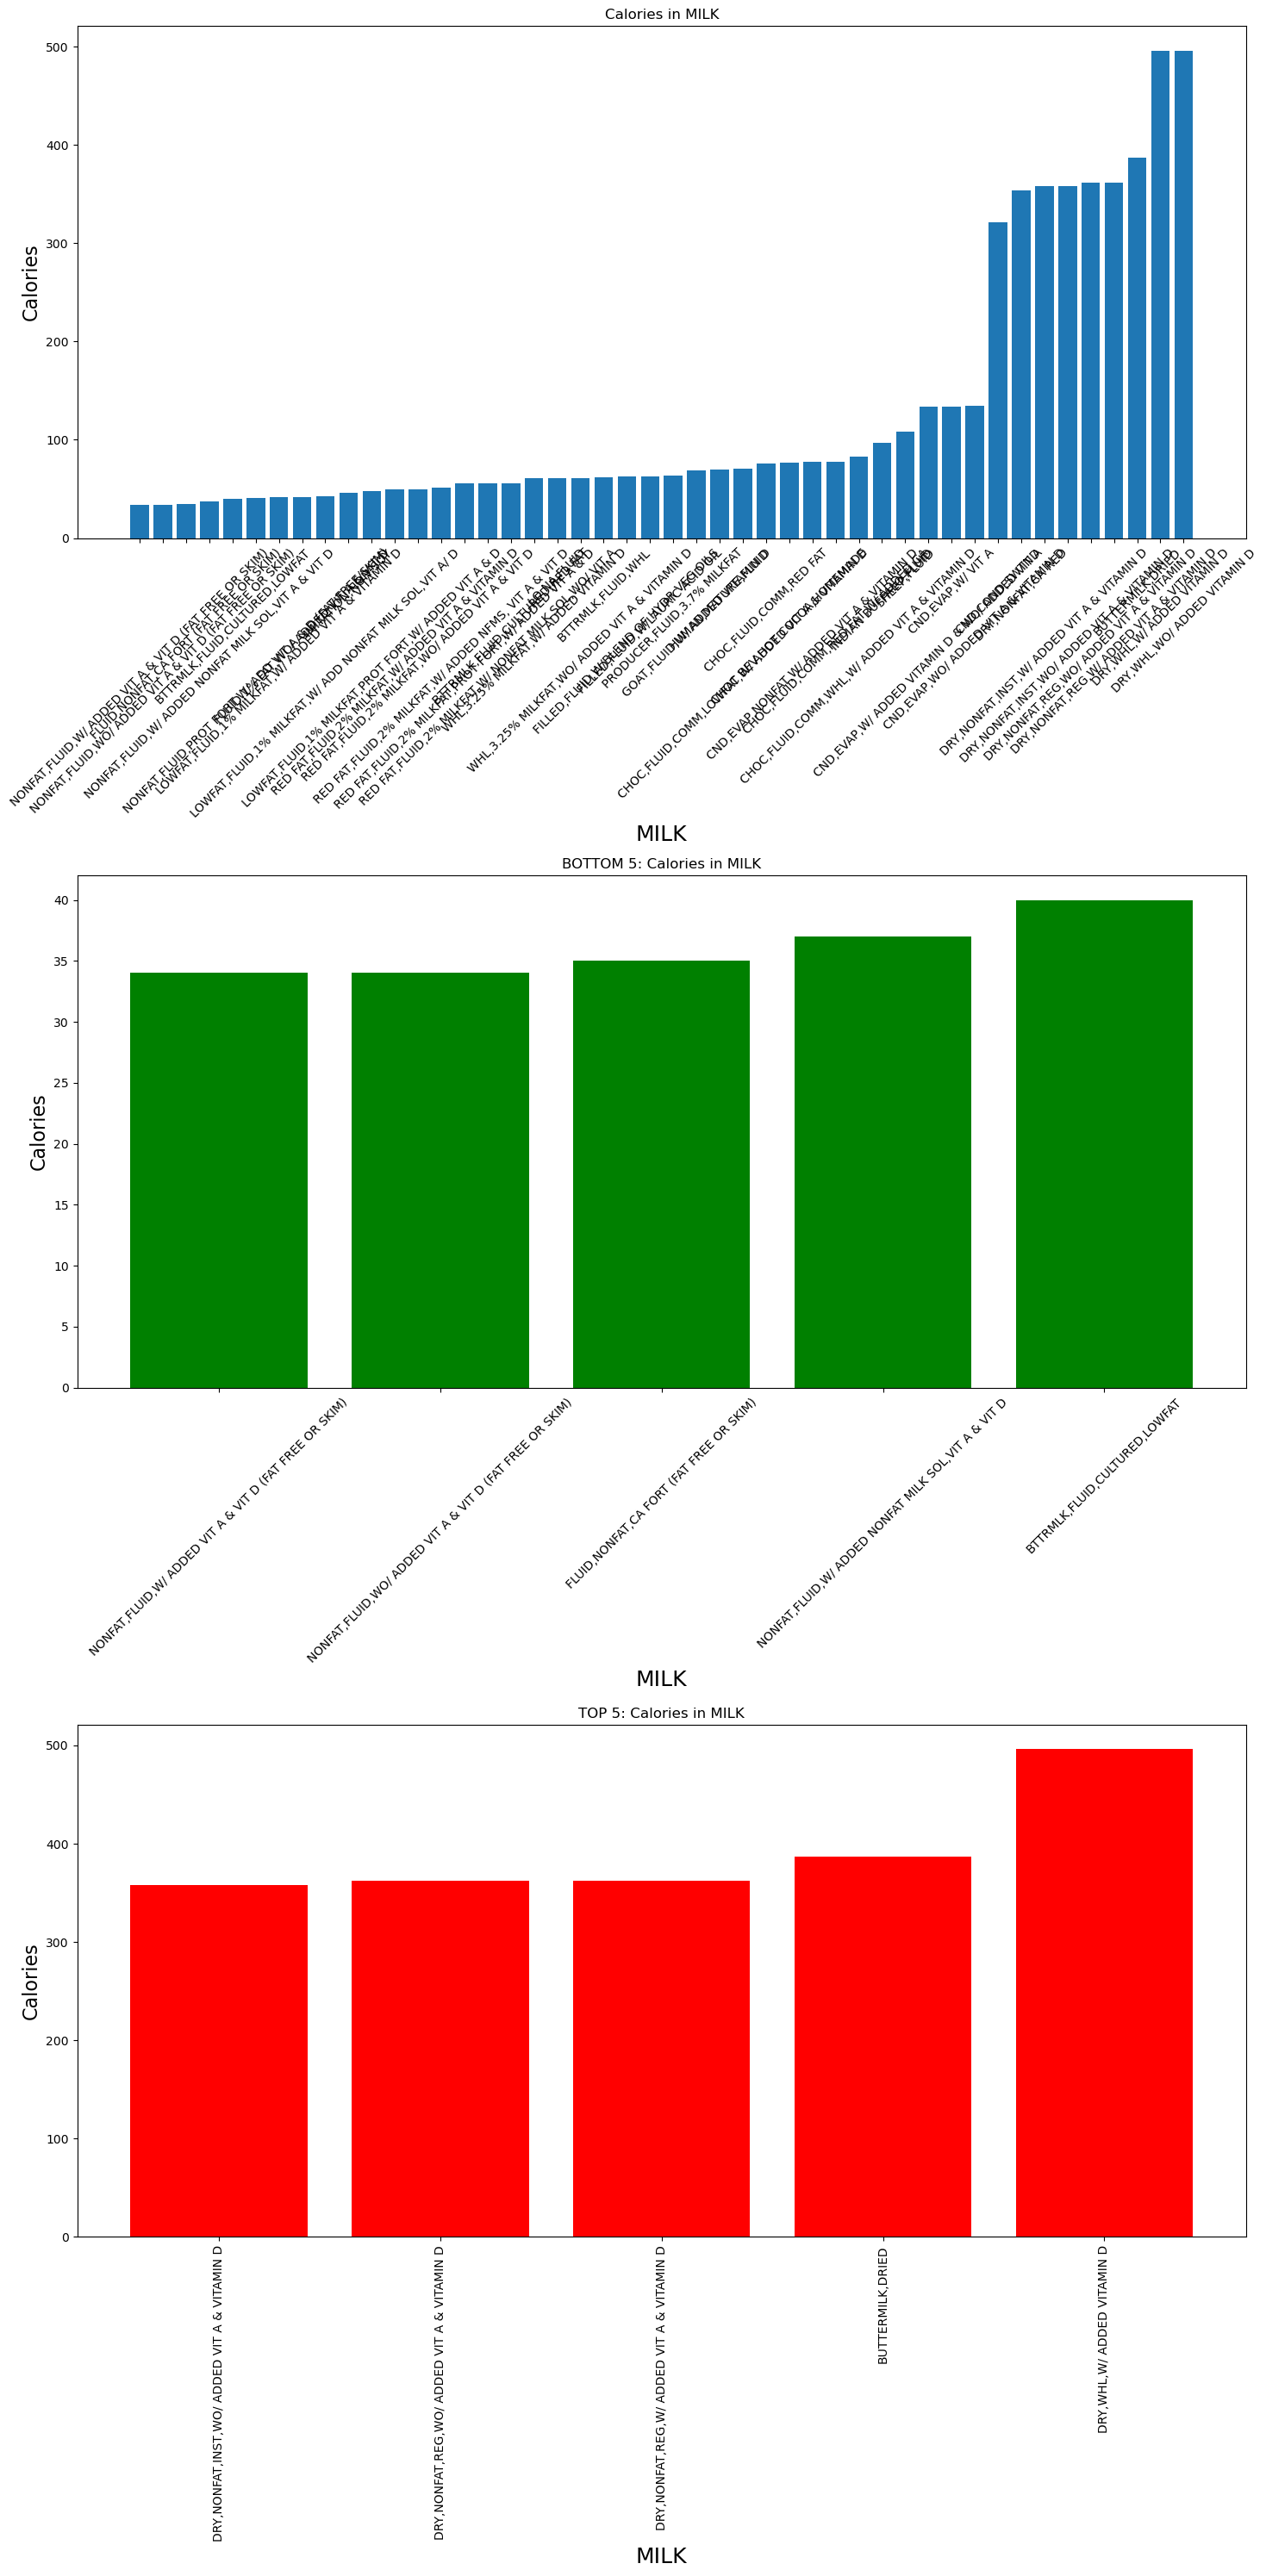

In [59]:
print("This is the nutrition checker! Please refer to above listed keys and select inputs from what is availble :)")

selectedcategory = input("What is your main food category").upper()
category_data = categories[selectedcategory]
selectednutrient = "Calories"
def sortByNutrient(item):
    #print(item)
    return item["value"] #index 0 is the key and index 1 is the selected nutrient
#returns a value we want it to be sorted 


sorted_data = []
for item in category_data.items(): #items is both the keys and the items in the dictionary
    sorted_data.append({"key":item[0],"value":item[1][selectednutrient]})

sorted_data.sort(key=sortByNutrient)
sorted_data_bottom = sorted_data[0:5]
sorted_data_top = sorted_data[-6:-1]
#print(sorted_data_bottom)


x_axis = np.arange(len(sorted_data))
y_values = []
x_labels = []


for item in sorted_data:
    x_labels.append(item["key"])
    y_values.append(item["value"])
#print(y_values)
    
#print(x_axis)

#######subplots

plt.rcdefaults()
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (15, 30))

fig.subplots_adjust(top=8)


ax1.set_xticks(x_axis)
ax1.set_xticklabels(x_labels, fontsize = 10,rotation=45)
ax1.bar(x_axis, y_values)
ax1.set_xlabel(f'{selectedcategory}', fontsize=18)
ax1.set_ylabel(f'{selectednutrient}', fontsize=16)
ax1.set_title(f'{selectednutrient} in {selectedcategory}')
#plt.savefig("./Esther's Resources/calories.png")



#########bottom 5 code


x_axis = np.arange(len(sorted_data_bottom))
y_values = []
x_labels = []


for item in sorted_data_bottom:
    x_labels.append(item["key"])
    y_values.append(item["value"])
#print(y_values)
    
#print(x_axis)


#fig2.xticks(x_axis,x_labels,fontsize = 5, rotation="vertical")
ax2.set_xticks(x_axis)
ax2.set_xticklabels(x_labels, fontsize = 10, rotation=45)
ax2.bar(x_axis, y_values, color='green')
ax2.set_xlabel(f'{selectedcategory}', fontsize=18)
ax2.set_ylabel(f'{selectednutrient}', fontsize=16)
ax2.set_title(f'BOTTOM 5: {selectednutrient} in {selectedcategory}')


#########top 5 code


x_axis = np.arange(len(sorted_data_top))
y_values = []
x_labels = []


for item in sorted_data_top:
    x_labels.append(item["key"])
    y_values.append(item["value"])
#print(y_values)
    
#print(x_axis)


#fig2.xticks(x_axis,x_labels,fontsize = 5, rotation="vertical")
ax3.set_xticks(x_axis)
ax3.set_xticklabels(x_labels, fontsize = 10,rotation="vertical")
ax3.bar(x_axis, y_values, color='red')
ax3.set_xlabel(f'{selectedcategory}', fontsize=18)
ax3.set_ylabel(f'{selectednutrient}', fontsize=16)
ax3.set_title(f'TOP 5: {selectednutrient} in {selectedcategory}')


fig.tight_layout()

fig.savefig(f"./Charts/{selectednutrient}allplots.png")






#tick_locations = [value+0.4 for value in x_axis]
#plt.figure(figsize=(20,3))


# plt.bar(x_axis, food_df2["Carbohydrt_(g)"], color='r', alpha=0.5, align="edge")


